# Exploratory data analysis

## Solar Irridence Data

Data Information


SORCE Spectral Irradiance


- ***SELECTION CRITERIA***
    - date range: 20030225 to 20200225
    - cadence: 24 hours (daily)
    - spectral range:    0.0 to 2413.0 nm
    - number of data:  5689117
    - identifier_product_doi: 10.5067/9PRENS3AL461
    - identifier_product_doi_authority: https://doi.org/
    
- ***END SELECTION CRITERIA***
;
- ***DATA DEFINITIONS***, number = 9 (name, type, format)
    - nominal_date_yyyymmdd, R8, f10.1
    - nominal_date_jdn, R8, f10.1
    - min_wavelength, R4, f8.2 (nm)
    - max_wavelength, R4, f8.2 (nm)
    - instrument_mode_id, I2, i3
    - data_version, I2, i3
    - irradiance, R8, e13.6 (W/m^2/nm)
    - irradiance_uncertainty, R4, e11.4 (W/m^2/nm, 1 sigma)
    - quality, R4, f8.1 
- ***END DATA DEFINITIONS***


Background on the SORCE Spectral Irradiance Instruments and Measurements


; The SORCE Solar Spectral Irradiance (SSI) composite data product is constructed
; using measurements from the XPS, SOLSTICE, and SIM instru- ments, which are
; combined into merged daily solar spectra over the spectral intervals shown in
; the table below.  Data files are also provided for the data from each instrument
; separately. The SORCE SSI data products are provided on a fixed wavelength
; scale, which varies in spectral resolution from 1-34 nm over the entire spectral
; range. Irradiances are reported at a mean solar distance of 1 AU and zero
; relative line-of-sight velocity with respect to the Sun.
; 

; Table: Solar Spectral Irradiance (SSI) Measurement Summary.
;

- Measuring Instrument    XPS         SOLSTICE (A&B)          SIM
- Temporal Cadence        Daily       Daily                   Daily
- Detector                Diodes      Photomultiplier Tubes   Diodes
- Instrument Modes        57          9, 11                   31, 41, 43, 44
- Spectral Range          0.1-27 nm   115-310 nm              240-2412.3 nm
- Spectral Resolution     7 nm        1 nm                    variable
- Accuracy                12 - 24%    1.2% - 6%               ~2%
- Long-Term Repeatability 1%/yr       0.2% - 0.5%/yr          < 0.1%/yr


; IRRADIANCE UNCERTAINTY is derived differently for the eoch SORCE instrument. For
; SIM, MISSING data have values of 0.0000e+00 for both IRRADIANCE and IRRADIANCE
; UNCERTAINTY. UV data before mission day 800 (yyyymmdd = 20050403) in the 306-310
; nm bandpass are treated as MISSING due to potential saturaton. All IR (950-1600
; nm) IRRADIANCE UNCERTAINTY values are set to 2.5000e-04. See the SORCE-SIM V27
; release notes for justification and further details.
; For SOLSTICE, the uncertainties are a combination of statistical and systematic 
; errors which are combined into a single uncertainty value.  Statistical errors 
; are estimated from the data, such as for dark-counts subtraction, temperature 
; correction and counting errors due to detector dead-time and other effects.  
; Systematic errors are measured and corrected, such as the “spider” and “splint” 
; correction.  See SOLSTICE V18 release notes for more information.
; For XPS, the uncertainty combines the effects of statistical measurement errors, 
; and field-of-view error, window transmission error and aperture area measurement 
; error added in quadrature.


; The QUALITY flags have different meaning for each SORCE instrument. However, for
; all instruments, if the first bit is set (1.0), this indicates a MISSING value,
; and if the second bit is set (2.0) this indicates that this value has been
; FILLED.  For SIM, additional flags alert the users to instrumental issues and
; time-dependent warnings where data may be of lesser quality.
; For XPS, only the first two bits are used. 0 = Good, 1 = Missing, 2 = Fill.
; For SOLSTICE, only the first two bits are used. 0 = Good, 1 = Missing, 2 = Fill.


; The 1-nm XPS data reported here are actually the XPS "Level 4" product, in which
; the CHIANTI spectral model is used to generate a higher spectral resolution
; estimate of the solar XUV irradiance by scaling the model reference spectra to
; match the XPS broad-band photometer currents (signal). The accuracy of the XPS
; Level 3 irradiance is 12-24%, photometer dependent, and the long-term
; repeatability is 1%/year. There is additional uncertainty in applying the
; spectral model for the XPS Level 4 irradiances, and this estimated accuracy is
; 30% for the integrated XUV irradiance. The spectral distribution in the XPS
; Level 4 data is from the CHIANTI model and not from direct measurements from the
; XPS's broadband photometers.


; Spectral irradiances are tabulated below ("DATA RECORDS"), with each row giving
; the nominal date in YYYYMMDD.D and Julian Day Number (JDN), the wavelength band
; (or wavelength of measurement if the MIN_WAVELENGTH and MAX_WAVELENGTH fields
; are identical), the INSTRUMENT_MODE, DATA_VERSION, spectral IRRADIANCE,
; IRRADIANCE_UNCERTAINTY, and data QUALITY flag. Each field (column) is defined
; and described in the "DATA DEFINITIONS" above. An IDL file reader
; (http://lasp.colorado.edu/data/sorce/file_readers/read_lasp_ascii_file.pro) is
; available which will read this file and return an array of structures whose
; field names and types are taken from the "DATA DEFINITIONS" section.


; Note that reported wavelengths longer than 310nm are SIM data, which report
; calculated irradiances at specific wavelengths. This wavelength is populated in
; both the MIN_WAVELENGTH and MAX_WAVELENGTH columns.


; Tom Woods, Jerald Harder and Martin Snow (2020), SORCE Solar Spectral Irradiance
; 24hr Means XPS (V12), SOLSTICE (V18) and SIM (V27), Greenbelt, MD, USA, Goddard
; Earth Sciences Data and Information Services Center (GES DISC),
; Accessed [Data Access Date] https://doi.org/10.5067/9PRENS3AL461


; This data file, release notes, and other SORCE data products may be obtained from:
; http://lasp.colorado.edu/home/sorce/data/


; For more information on the SORCE instruments and data products, see:
; http://lasp.colorado.edu/home/sorce/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#pip install numpy==1.22.4

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Program_Files\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [3]:
solarIri = pd.read_csv("../Data/solarIridence.txt",sep=' ',header=0)
print(solarIri.head())
print(solarIri.info())
print(solarIri.describe())


   nominal_date_yyyymmdd  nominal_date_jdn  min_wavelength  max_wavelength  \
0             20030225.5         2452696.0             0.0             1.0   
1             20030225.5         2452696.0             1.0             2.0   
2             20030225.5         2452696.0             2.0             3.0   
3             20030225.5         2452696.0             3.0             4.0   
4             20030225.5         2452696.0             4.0             5.0   

   instrument_mode_id  data_version  irradiance  irradiance_uncertainty  \
0                  57            12    0.000001                0.074467   
1                  57            12    0.000043                0.074467   
2                  57            12    0.000041                0.074467   
3                  57            12    0.000034                0.074467   
4                  57            12    0.000040                0.074467   

   quality  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
<c

In [4]:
#Backup of original dataset
solarIri_backup = solarIri.copy()

#check quality flags as per defination, change number to see count for different flags
solarIri[solarIri['quality']>=2]
#(solarIri['quality']>=2).sum()

#drop unnecssary columns
solarIri.drop(['nominal_date_jdn','data_version', 'instrument_mode_id'], inplace=True, axis=1)

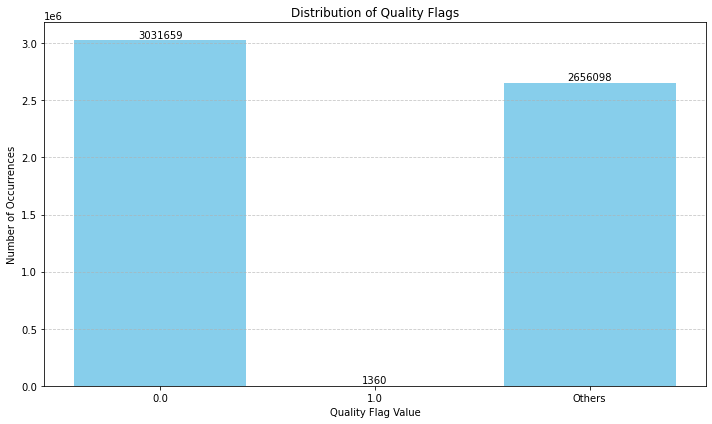

In [5]:
# Counting occurrences of each quality flag value
quality_counts = solarIri['quality'].value_counts()

# Grouping values other than 0.0, 1.0, and 2.0 as "Others"
allowed_values = [0.0, 1.0]
other_count = quality_counts[~quality_counts.index.isin(allowed_values)].sum()
quality_counts = quality_counts[quality_counts.index.isin(allowed_values)]
quality_counts['Others'] = other_count

# Convert index to string for consistent datatype
quality_counts.index = quality_counts.index.astype(str)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(quality_counts.index, quality_counts.values, color='skyblue')

# Displaying the values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.title('Distribution of Quality Flags')
plt.xlabel('Quality Flag Value')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [6]:
#Remove data with quality flag = 1
solarIri.drop(solarIri[solarIri.quality == 1].index, inplace = True)

In [7]:
print(solarIri.isnull().sum())

nominal_date_yyyymmdd     0
min_wavelength            0
max_wavelength            0
irradiance                0
irradiance_uncertainty    0
quality                   0
dtype: int64


In [6]:
#NO N/A values, uncomment if irridence has N/A values
#solarIri = solarIri.dropna(subset=['irradiance'])

In [8]:
# Convert the 'nominal_date_yyyymmdd' column to datetime format
solarIri['nominal_date_yyyymmdd'] = pd.to_datetime(solarIri['nominal_date_yyyymmdd'], format='%Y%m%d')

# Alternatively, if the column is in float format, convert it to integer first and then to datetime
#solarIri['nominal_date_yyyymmdd'] = pd.to_datetime(solarIri['nominal_date_yyyymmdd'].astype(int), format='%Y%m%d')

# Check the updated column
print(solarIri['nominal_date_yyyymmdd'])

0         2003-02-25
1         2003-02-25
2         2003-02-25
3         2003-02-25
4         2003-02-25
             ...    
5689112   2020-02-25
5689113   2020-02-25
5689114   2020-02-25
5689115   2020-02-25
5689116   2020-02-25
Name: nominal_date_yyyymmdd, Length: 5687757, dtype: datetime64[ns]


In [9]:
# Extract 'Year', 'Month', and 'Day' components
solarIri['Year'] = solarIri['nominal_date_yyyymmdd'].dt.year
solarIri['Month'] = solarIri['nominal_date_yyyymmdd'].dt.month
solarIri['Day'] = solarIri['nominal_date_yyyymmdd'].dt.day

In [10]:
print(solarIri.head())
print(solarIri.info())

  nominal_date_yyyymmdd  min_wavelength  max_wavelength  irradiance  \
0            2003-02-25             0.0             1.0    0.000001   
1            2003-02-25             1.0             2.0    0.000043   
2            2003-02-25             2.0             3.0    0.000041   
3            2003-02-25             3.0             4.0    0.000034   
4            2003-02-25             4.0             5.0    0.000040   

   irradiance_uncertainty  quality  Year  Month  Day  
0                0.074467      0.0  2003      2   25  
1                0.074467      0.0  2003      2   25  
2                0.074467      0.0  2003      2   25  
3                0.074467      0.0  2003      2   25  
4                0.074467      0.0  2003      2   25  
<class 'pandas.core.frame.DataFrame'>
Index: 5687757 entries, 0 to 5689116
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   nominal_date_yyyymmdd   datetime64[ns]
 1  

In [11]:
Q1 = solarIri['irradiance'].quantile(0.25)
Q3 = solarIri['irradiance'].quantile(0.75)
IQR = Q3 - Q1
outliers = solarIri[(solarIri['irradiance'] < (Q1 - 1.5 * IQR)) | (solarIri['irradiance'] > (Q3 + 1.5 * IQR))]
print("Number of Outliers:", len(outliers))

Number of Outliers: 0


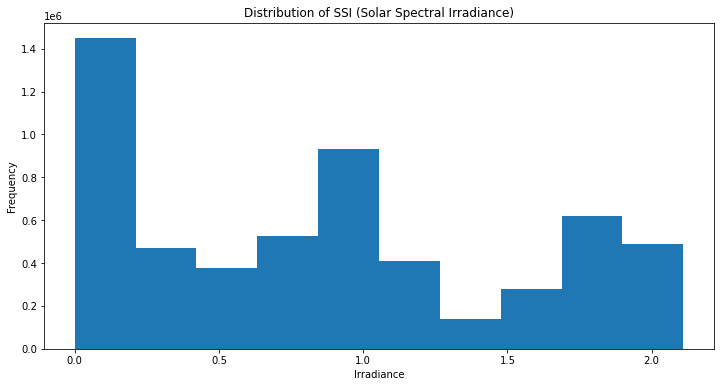

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(solarIri['irradiance'])
plt.title("Distribution of SSI (Solar Spectral Irradiance)")
plt.xlabel("Irradiance")
plt.ylabel("Frequency")
plt.show()

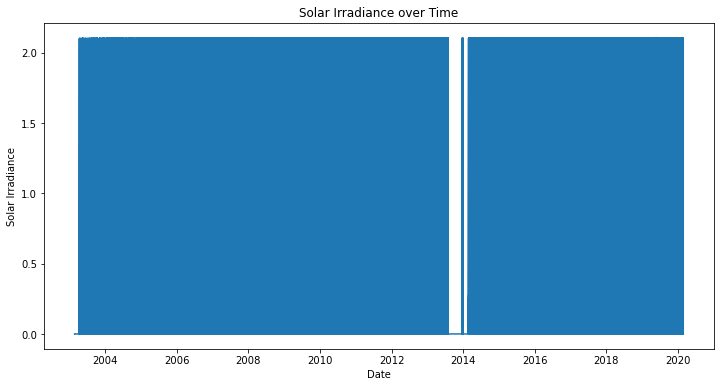

In [13]:
import math
# Plot the solar irradiance over time
plt.figure(figsize=(12, 6))
plt.plot(solarIri['nominal_date_yyyymmdd'].values, solarIri['irradiance'].values)
plt.xlabel('Date')
plt.ylabel('Solar Irradiance')
plt.title('Solar Irradiance over Time')
plt.show()

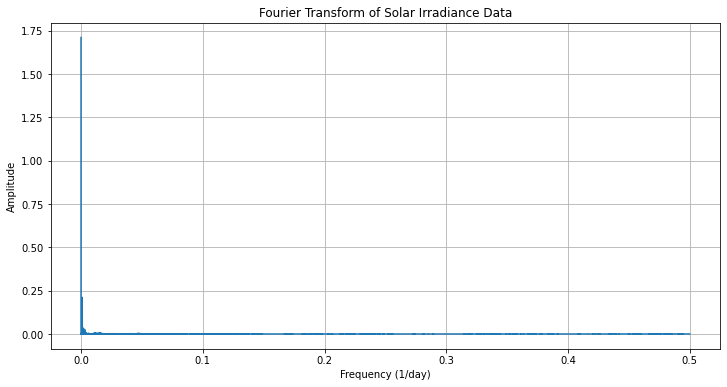

In [14]:
from numpy.fft import fft, fftfreq

# Perform Fourier transform on the irradiance values
irradiance_values = solarIri['irradiance'].values
N = len(irradiance_values)
dt = 1  # Assuming daily data
yf = fft(irradiance_values)
xf = fftfreq(N, dt)[:N//2]

# Plot the Fourier transform results
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title("Fourier Transform of Solar Irradiance Data")
plt.xlabel("Frequency (1/day)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

### Do not run below 3 lines of code

In [12]:
# Select a specific wavelength for conversion
wavelength = 0.01

# Filter the data for the selected wavelength
wavelength_data = solarIri[solarIri['min_wavelength'] >= wavelength].copy()

# Calculate the width of the wavelength band in nanometers
wavelength_width = wavelength_data['max_wavelength'] - wavelength_data['min_wavelength']


# Convert the irradiance to W/m^2 by multiplying with the wavelength width (only when not zero)
wavelength_data['irradiance_converted'] = wavelength_data['irradiance'].mul(wavelength_width.where(wavelength_width != 0, 1))

In [13]:
wavelength_data['irradiance_converted']

1          0.000043
2          0.000041
3          0.000034
4          0.000040
5          0.000054
             ...   
5689112    0.064849
5689113    0.064273
5689114    0.063330
5689115    0.062469
5689116    0.000000
Name: irradiance_converted, Length: 5681889, dtype: float64

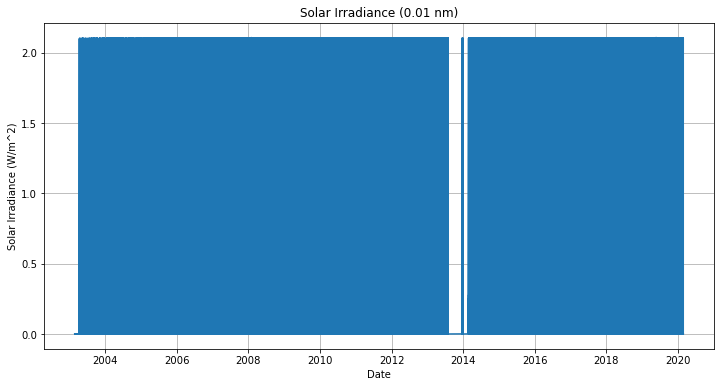

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(wavelength_data['nominal_date_yyyymmdd'].values, wavelength_data['irradiance_converted'].values)
plt.xlabel('Date')
plt.ylabel('Solar Irradiance (W/m^2)')
plt.title(f'Solar Irradiance ({wavelength} nm)')
plt.grid(True)
plt.show()

D:\Program_Files\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


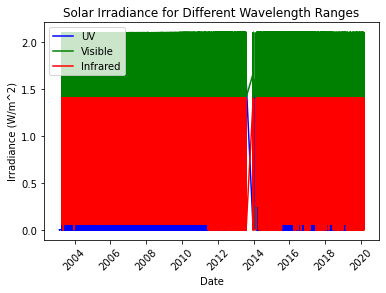

In [15]:
# Define the wavelength ranges and corresponding colors
wavelength_ranges = [
    {'label': 'UV', 'min': 0, 'max': 400},
    {'label': 'Visible', 'min': 400, 'max': 700},
    {'label': 'Infrared', 'min': 700, 'max': 2413}
]
colors = ['blue', 'green', 'red']

# Create a figure and axis
fig, ax = plt.subplots()

# Iterate over the wavelength ranges
for i, wavelength_range in enumerate(wavelength_ranges):
    # Extract the data for the current wavelength range
    data_range = solarIri[(solarIri['min_wavelength'] >= wavelength_range['min']) & (solarIri['max_wavelength'] <= wavelength_range['max'])]

    # Plot the irradiance data for the current wavelength range
    ax.plot(data_range['nominal_date_yyyymmdd'].values, data_range['irradiance'].values, color=colors[i], label=wavelength_range['label'])

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Irradiance (W/m^2)')
ax.set_title('Solar Irradiance for Different Wavelength Ranges')

# Add a legend
ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
#pip install git+https://github.com/statsmodels/statsmodels.git

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

data = solarIri.copy()

# Set the 'nominal_date_yyyymmdd' column as the index
data.set_index('nominal_date_yyyymmdd', inplace=True)

# Group the data by date and calculate the mean irradiance for each date
grouped_data = data.groupby(['nominal_date_yyyymmdd', 'max_wavelength'])['irradiance'].mean()

# Analyzing a specific spectrum
uv_data = data[(data['min_wavelength'] >= wavelength_ranges[0]['min']) & (data['max_wavelength'] <= wavelength_ranges[0]['max'])]
visisble_data = data[(data['min_wavelength'] >= wavelength_ranges[1]['min']) & (data['max_wavelength'] <= wavelength_ranges[1]['max'])]
Infrared_data = data[(data['min_wavelength'] >= wavelength_ranges[2]['min']) & (data['max_wavelength'] <= wavelength_ranges[2]['max'])]


# Select a subset of the data for decomposition
#data = data['irradiance'].iloc[:36500]  # Adjust the subset size as needed

# Set the frequency of the DatetimeIndex to daily
#data.index.freq = 'D'

# Plot the time series of solar irradiance
# plt.figure(figsize=(12, 6))
# plt.plot(data.index, data['irradiance'])
# plt.xlabel('Date')
# plt.ylabel('Irradiance (W/m^2)')
# plt.title('Solar Irradiance Time Series')
# plt.show()

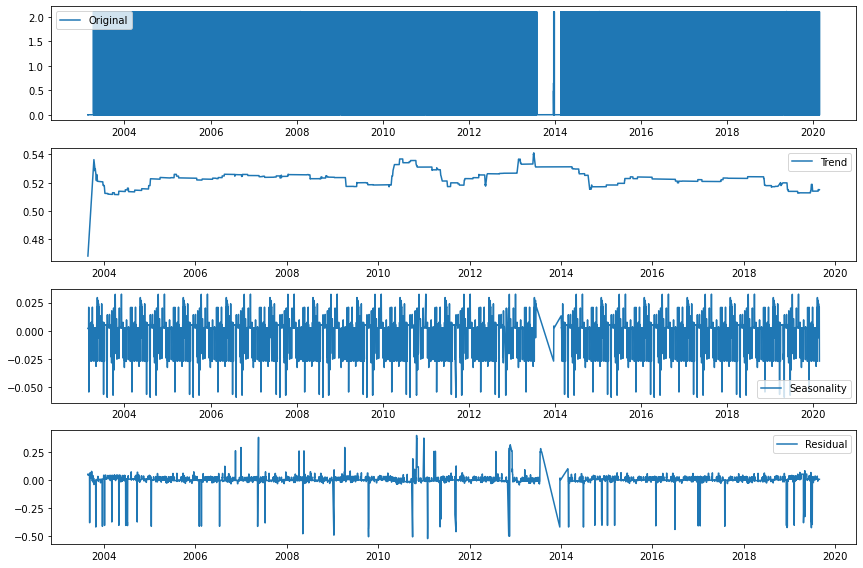

ADF Statistic: -14.5567563033373
p-value: 4.867115755884555e-27
Critical Values:
1% : -3.4314543443318457
5% : -2.8620280175321957
10% : -2.567029769441738


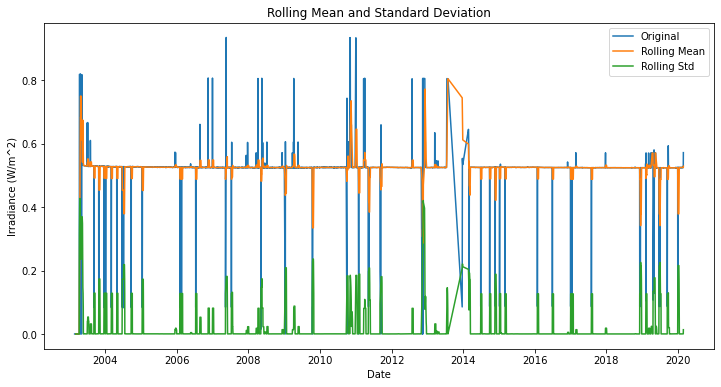

In [98]:
#UV

# Group the data by date and calculate the mean irradiance for each date
grouped_data = uv_data.groupby(['nominal_date_yyyymmdd'])['irradiance'].mean()

# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(grouped_data, model='additive',period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['irradiance'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(grouped_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, ':', value)

# Calculate rolling mean and standard deviation
rolling_mean = grouped_data.rolling(window=12).mean()
rolling_std = grouped_data.rolling(window=12).std()

# Plot the rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(grouped_data, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m^2)')
plt.title('Rolling Mean and Standard Deviation')
plt.legend(loc='best')
plt.show()

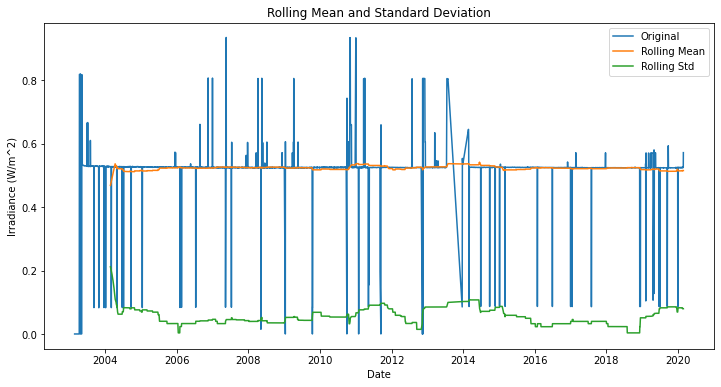

In [99]:
# Calculate rolling mean and standard deviation
rolling_mean = grouped_data.rolling(window=365).mean()
rolling_std = grouped_data.rolling(window=365).std()

# Plot the rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(grouped_data, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m^2)')
plt.title('Rolling Mean and Standard Deviation')
plt.legend(loc='best')
plt.show()

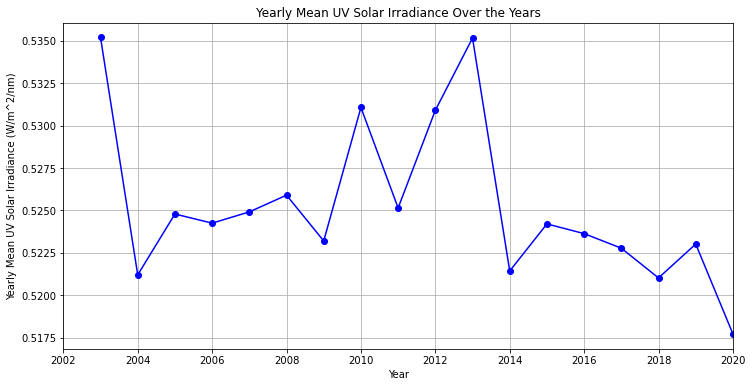

In [18]:
# Group by year and calculate the yearly mean of irradiance
yearly_mean = uv_data.groupby(uv_data.index.year)['irradiance'].mean()

# Plotting the line graph for each year
plt.figure(figsize=(12, 6))
yearly_mean.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean UV Solar Irradiance (W/m^2/nm)')
plt.title('Yearly Mean UV Solar Irradiance Over the Years')
plt.grid(True)
plt.xlim(2002,2020)
plt.show()

#uv_data

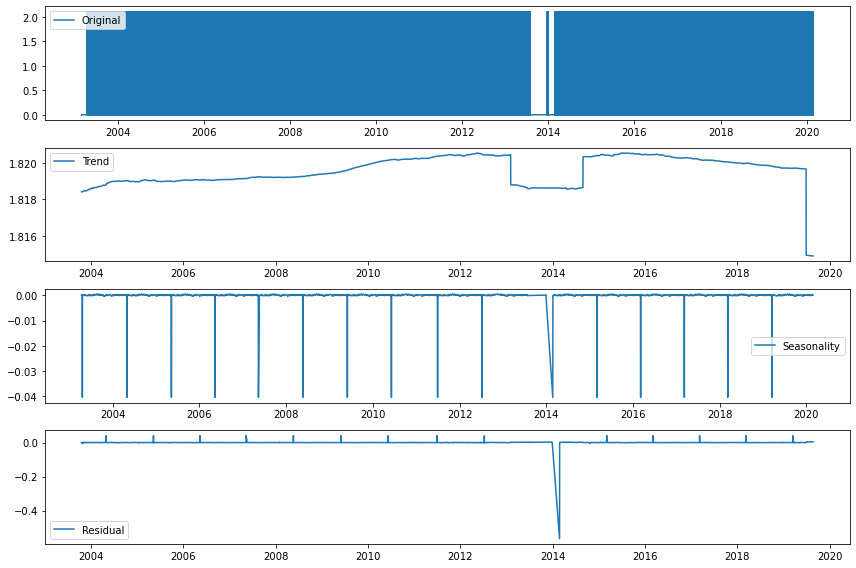

ADF Statistic: -76.09654952907634
p-value: 0.0
Critical Values:
1% : -3.431476604615945
5% : -2.8620378526446375
10% : -2.567035004946881


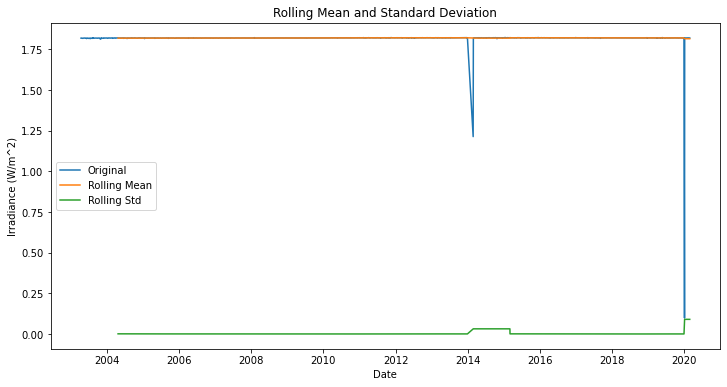

In [100]:
#VISIBLE 

# Group the data by date and calculate the mean irradiance for each date
grouped_data = visisble_data.groupby(['nominal_date_yyyymmdd'])['irradiance'].mean()

# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(grouped_data, model='additive',period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['irradiance'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(grouped_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, ':', value)

# Calculate rolling mean and standard deviation
rolling_mean = grouped_data.rolling(window=365).mean()
rolling_std = grouped_data.rolling(window=365).std()

# Plot the rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(grouped_data, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m^2)')
plt.title('Rolling Mean and Standard Deviation')
plt.legend(loc='best')
plt.show()

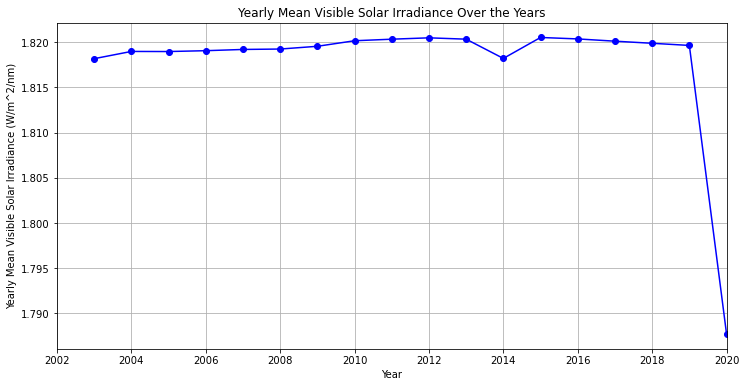

In [21]:
# Group by year and calculate the yearly mean of irradiance
yearly_mean = visisble_data.groupby(visisble_data.index.year)['irradiance'].mean()

# Plotting the line graph for each year
plt.figure(figsize=(12, 6))
yearly_mean.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Visible Solar Irradiance (W/m^2/nm)')
plt.title('Yearly Mean Visible Solar Irradiance Over the Years')
plt.grid(True)
plt.xlim(2002,2020)
plt.show()


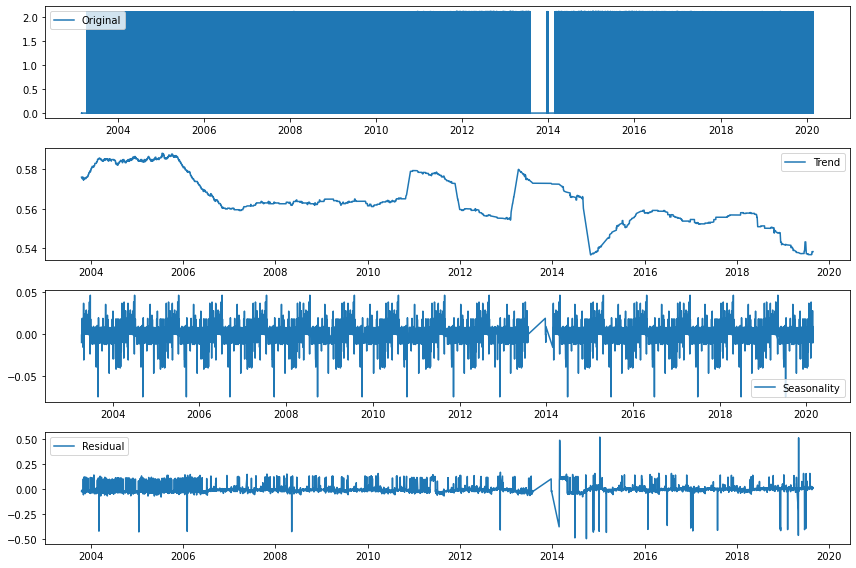

ADF Statistic: -7.920779532521357
p-value: 3.729375360030325e-12
Critical Values:
1% : -3.4314767987432786
5% : -2.8620379384142955
10% : -2.5670350506045216


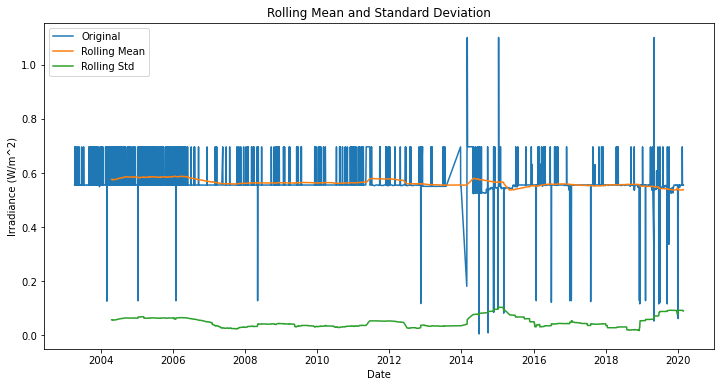

In [101]:
#INFRARED 

# Group the data by date and calculate the mean irradiance for each date
grouped_data = Infrared_data.groupby(['nominal_date_yyyymmdd'])['irradiance'].mean()

# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(grouped_data, model='additive',period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['irradiance'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(grouped_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, ':', value)

# Calculate rolling mean and standard deviation
rolling_mean = grouped_data.rolling(window=365).mean()
rolling_std = grouped_data.rolling(window=365).std()

# Plot the rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(grouped_data, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m^2)')
plt.title('Rolling Mean and Standard Deviation')
plt.legend(loc='best')
plt.show()

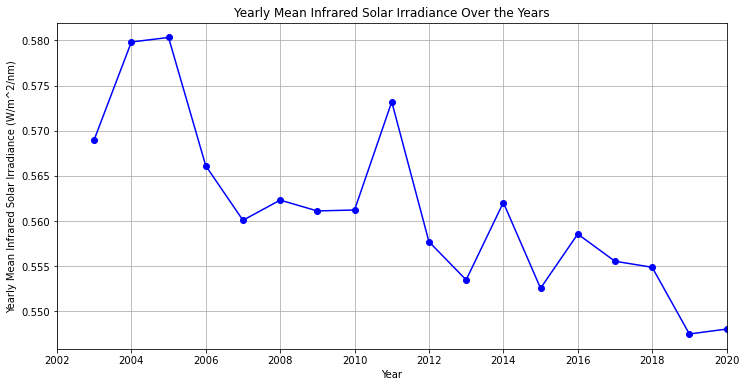

In [23]:
# Group by year and calculate the yearly mean of irradiance
yearly_mean = Infrared_data.groupby(Infrared_data.index.year)['irradiance'].mean()

# Plotting the line graph for each year
plt.figure(figsize=(12, 6))
yearly_mean.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Infrared Solar Irradiance (W/m^2/nm)')
plt.title('Yearly Mean Infrared Solar Irradiance Over the Years')
plt.grid(True)
plt.xlim(2002,2020)
plt.show()

In [ ]:
grouped_data

## Sunspot Data

### Descirption of data

- Filename: SN_d_tot_V2.0.txt
- Format: plain ASCII text

Contents:
- Column 1-3: Gregorian calendar date
    - Year
    - Month
    - Day
- Column 4: Date in fraction of year
- Column 5: Daily total sunspot number. A value of -1 indicates that no number is available for that day (missing value).
- Column 6: Daily standard deviation of the input sunspot numbers from individual stations.
- Column 7: Number of observations used to compute the daily value.
- Column 8: Definitive/provisional indicator. A blank indicates that the value is definitive. A '*' symbol indicates that the value is still provisional and is subject to a possible revision (Usually the last 3 to 6 months)

Line format [character position]:
- [1-4] Year
- [6-7] Month
- [9-10] Day
- [12-19] Decimal date
- [22-24] Daily sunspot number
- [26-30] Standard deviation
- [33-35] Number of observations
- [37] Definitive/provisional indicator

In [45]:
#Read SUNSPOTS data
ssData = pd.read_csv("SN_d_tot_V2.0.txt",sep=' ',header=0)
print(ssData.head())
print(ssData.info())
print(ssData.describe())

   Year  Month  Day  Date_in_fraction_of_year  sunspot_number  \
0  1818      1    1                  1818.001              -1   
1  1818      1    2                  1818.004              -1   
2  1818      1    3                  1818.007              -1   
3  1818      1    4                  1818.010              -1   
4  1818      1    5                  1818.012              -1   

   standard_deviation  Number_of_observations Definitive_provisional_indicator  
0                -1.0                       0                              NaN  
1                -1.0                       0                              NaN  
2                -1.0                       0                              NaN  
3                -1.0                       0                              NaN  
4                -1.0                       0                              NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75026 entries, 0 to 75025
Data columns (total 8 columns):
 #   Column    

C:\Users\asus\AppData\Local\Temp/ipykernel_2332/3930177217.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ssData = pd.read_csv("SN_d_tot_V2.0.txt",sep=' ',header=0)


In [53]:
#Check columns for null values
print(ssData.isnull().sum())

Year                        0
Month                       0
Day                         0
Date_in_fraction_of_year    0
sunspot_number              0
standard_deviation          0
dtype: int64


In [47]:
#Backup sunspot data
ssData_backup = ssData.copy()

#Drop unncessary columns
ssData.drop(['Number_of_observations','Definitive_provisional_indicator'], inplace = True, axis = 1)

In [48]:
#ssData[ssData['sunspot_number'] == -1]
(ssData['sunspot_number'] == -1).sum()

3247

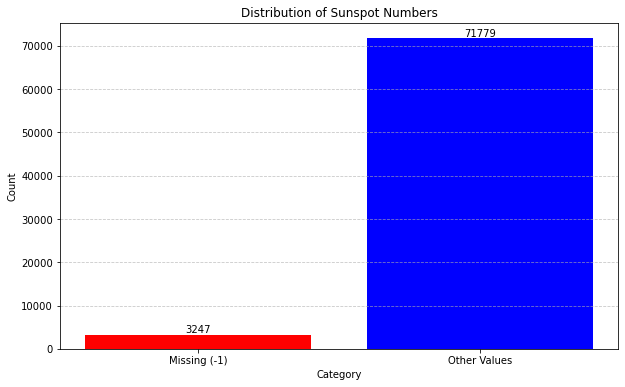

In [39]:
# Sample data for demonstration (counts of -1 and other values)
labels = ['Missing (-1)', 'Other Values']
values = [(ssData['sunspot_number'] == -1).sum(), (ssData['sunspot_number'] != -1).sum()]  # Replace with actual counts from your data

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['red', 'blue'])

# Add annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.title('Distribution of Sunspot Numbers')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [49]:
ssData = ssData[ssData['sunspot_number'] != -1]

<AxesSubplot:>

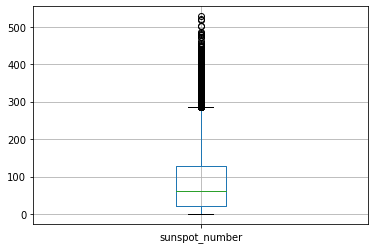

In [50]:
ssData.boxplot('sunspot_number')

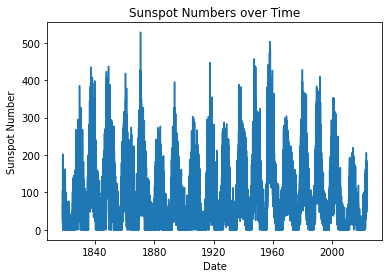

<Figure size 864x576 with 0 Axes>

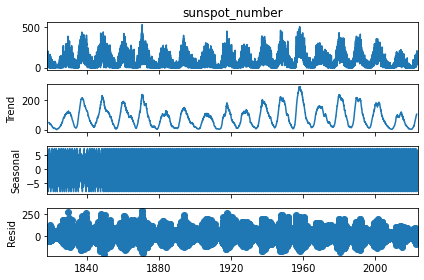

ADF Statistic: -7.6677366803601155
p-value: 1.6241920274016296e-11
Critical Values:
1%: -3.4304411878139973
5%: -2.8615803034099847
10%: -2.5667914521253423


In [102]:
#Create Date columns out of Year, Month and Day columns and set it as index for time series analysis
ssData['Date'] = pd.to_datetime(ssData[['Year', 'Month', 'Day']])
ssData.set_index('Date', inplace=True)

sunspot_data = ssData.copy()
#sunspot_data = sunspot_data[(sunspot_data['Year'] >= 2003) & (sunspot_data['Year'] <= 2020)]
# Plotting sunspot numbers over time
plt.plot(sunspot_data['sunspot_number'])
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Numbers over Time')
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(sunspot_data['sunspot_number'], model='additive', period=365)

# Plotting the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

from statsmodels.tsa.stattools import adfuller

# Performing Augmented Dickey-Fuller test for stationarity
result = adfuller(sunspot_data['sunspot_number'])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

In [26]:
sunspot_data

Year  Month  Day  Date_in_fraction_of_year  sunspot_number  \
Date                                                                     
1818-01-01  1818      1    1                  1818.001              -1   
1818-01-02  1818      1    2                  1818.004              -1   
1818-01-03  1818      1    3                  1818.007              -1   
1818-01-04  1818      1    4                  1818.010              -1   
1818-01-05  1818      1    5                  1818.012              -1   
...          ...    ...  ...                       ...             ...   
2023-05-27  2023      5   27                  2023.401             139   
2023-05-28  2023      5   28                  2023.404             146   
2023-05-29  2023      5   29                  2023.407             157   
2023-05-30  2023      5   30                  2023.410             165   
2023-05-31  2023      5   31                  2023.412             179   

            standard_deviation  
Date                            
1818-01-01                -1.0  
1818-01-02                -1.0  
1818-01-03                -1.0  
1818-01-04                -1.0  
1818-01-05                -1.0  
...                        ...  
2023-05-27                12.3  
2023-05-28                14.4  
2023-05-29                15.1  
2023-05-30                11.9  
2023-05-31                24.3  

[75026 rows x 6 columns]

In [27]:
int(len(sunspot_data)/2)

37513

### MERGED DATA - SOLAR IRRADIANCE AND SUNSPOT NUMBER

In [135]:
# Perform a left join with sunspots data based on 'Year', 'Month', and 'Day'
merged_data = solarIri.merge(ssData, on=['Year', 'Month', 'Day'], how='left')

# Print the merged data
print(merged_data.head())

  nominal_date_yyyymmdd  min_wavelength  max_wavelength  irradiance  \
0            2003-02-25             0.0             1.0    0.000001   
1            2003-02-25             1.0             2.0    0.000043   
2            2003-02-25             2.0             3.0    0.000041   
3            2003-02-25             3.0             4.0    0.000034   
4            2003-02-25             4.0             5.0    0.000040   

   irradiance_uncertainty  quality  Year  Month  Day  \
0                0.074467      0.0  2003      2   25   
1                0.074467      0.0  2003      2   25   
2                0.074467      0.0  2003      2   25   
3                0.074467      0.0  2003      2   25   
4                0.074467      0.0  2003      2   25   

   Date_in_fraction_of_year  sunspot_number  standard_deviation  
0                  2003.152              53                 2.5  
1                  2003.152              53                 2.5  
2                  2003.152           

In [136]:
print(merged_data.isnull().sum())

nominal_date_yyyymmdd       0
min_wavelength              0
max_wavelength              0
irradiance                  0
irradiance_uncertainty      0
quality                     0
Year                        0
Month                       0
Day                         0
Date_in_fraction_of_year    0
sunspot_number              0
standard_deviation          0
dtype: int64


In [137]:
merged_data.drop(['Date_in_fraction_of_year'], inplace = True, axis = 1)

In [130]:
import seaborn as sns

Correlation: 0.0033132284227656524


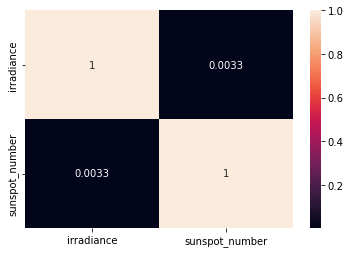

In [138]:
# Calculate the correlation between sunspot numbers and solar irradiance
correlation = merged_data['sunspot_number'].corr(merged_data['irradiance'])

# Print the correlation coefficient
print('Correlation:', correlation)

# Scatter plot of sunspot numbers and solar irradiance
# plt.scatter(merged_data['sunspot_number'], merged_data['irradiance'])
# plt.xlabel('Sunspot Number')
# plt.ylabel('Solar Irradiance (W/m^2)')
# plt.title('Correlation between Sunspot Number and Solar Irradiance')
# plt.show()

sns.heatmap(merged_data[['irradiance','sunspot_number']].corr(), annot = True)
plt.show()

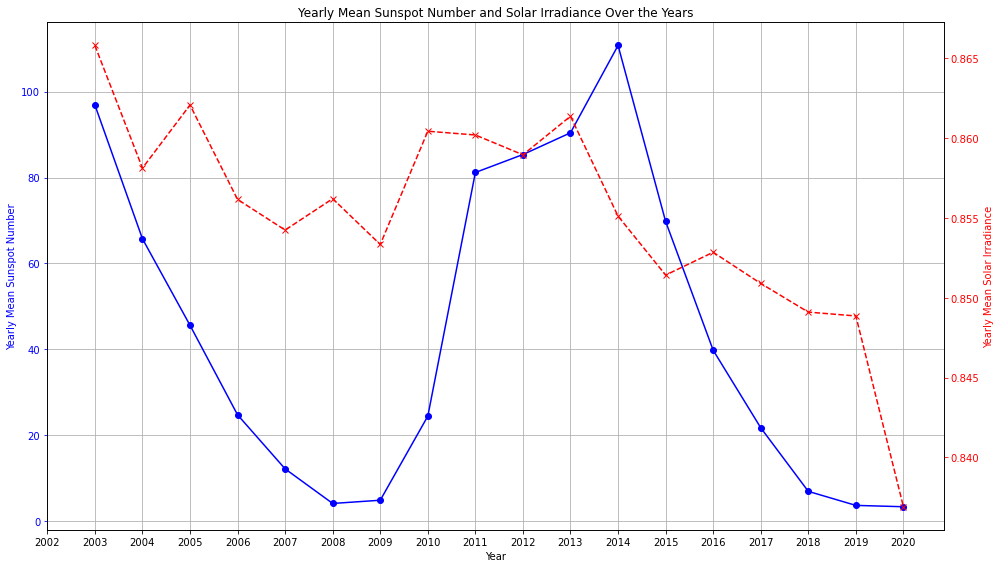

0.5852740052266496


In [143]:
#merged_data_backup = merged_data.copy()
merged_data = merged_data_backup.copy()

# Convert 'nominal_date_yyyymmdd' to a datetime index
merged_data['nominal_date_yyyymmdd'] = pd.to_datetime(merged_data['nominal_date_yyyymmdd'])
merged_data.set_index('nominal_date_yyyymmdd', inplace=True)

# Group by year and calculate the yearly mean of sunspot number and irradiance
yearly_mean_sunspot = merged_data.groupby(merged_data.index.year)['sunspot_number'].mean()
yearly_mean_irradiance = merged_data.groupby(merged_data.index.year)['irradiance'].mean()

# Create a single figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot yearly mean sunspot number on the primary y-axis (ax1)
ax1.plot(yearly_mean_sunspot.index.values, yearly_mean_sunspot.values, marker='o', linestyle='-', color='b', label='Yearly Mean Sunspot Number')
ax1.set_xlabel('Year')
ax1.set_ylabel('Yearly Mean Sunspot Number', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Yearly Mean Sunspot Number and Solar Irradiance Over the Years')
ax1.grid(True)

# Create a secondary y-axis (ax2) for the yearly mean solar irradiance
ax2 = ax1.twinx()
ax2.plot(yearly_mean_irradiance.index.values, yearly_mean_irradiance.values, marker='x', linestyle='--', color='r', label='Yearly Mean Solar Irradiance')
ax2.set_ylabel('Yearly Mean Solar Irradiance', color='r')
ax2.tick_params('y', colors='r')

# Set the x-axis ticks from 2002 to the maximum year in the data
ax1.set_xticks(range(2002, max(yearly_mean_sunspot.index.max(), yearly_mean_irradiance.index.max()) + 1))

# Show the plot
plt.tight_layout()
plt.show()

# Calculate the correlation between sunspot numbers and solar irradiance
correlation = yearly_mean_sunspot.corr(yearly_mean_irradiance)
print(correlation)

merged_data = merged_data_backup.copy()

In [144]:
# Splitting data into diffrent spectral ranges

uv_merged_data = merged_data[(merged_data['min_wavelength'] >= wavelength_ranges[0]['min']) & (merged_data['max_wavelength'] <= wavelength_ranges[0]['max'])]
visible_merged_data = merged_data[(merged_data['min_wavelength'] >= wavelength_ranges[1]['min']) & (merged_data['max_wavelength'] <= wavelength_ranges[1]['max'])]
infrared_merged_data = merged_data[(merged_data['min_wavelength'] >= wavelength_ranges[2]['min']) & (merged_data['max_wavelength'] <= wavelength_ranges[2]['max'])]

Correlation: 0.0027741681910924162


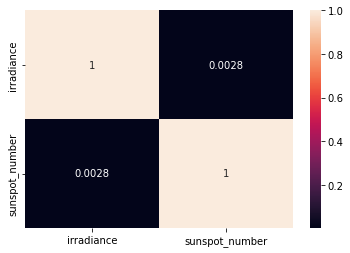

In [145]:
# UV DATA CORRELATION ANALYSIS

# Calculate the correlation between sunspot numbers and solar irradiance
correlation = uv_merged_data['sunspot_number'].corr(uv_merged_data['irradiance'])

# Print the correlation coefficient
print('Correlation:', correlation)

# Scatter plot of sunspot numbers and solar irradiance
# plt.scatter(uv_merged_data['sunspot_number'], uv_merged_data['irradiance'])
# plt.xlabel('Sunspot Number')
# plt.ylabel('Solar Irradiance (W/m^2)')
# plt.title('Correlation between Sunspot Number and Solar Irradiance')
# plt.show()

sns.heatmap(uv_merged_data[['irradiance','sunspot_number']].corr(), annot = True)
plt.show()

C:\Users\asus\AppData\Local\Temp/ipykernel_2332/3162194769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uv_merged_data['nominal_date_yyyymmdd'] = pd.to_datetime(uv_merged_data['nominal_date_yyyymmdd'])


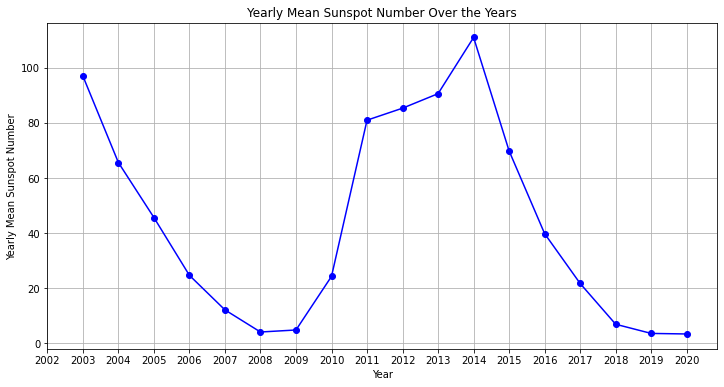

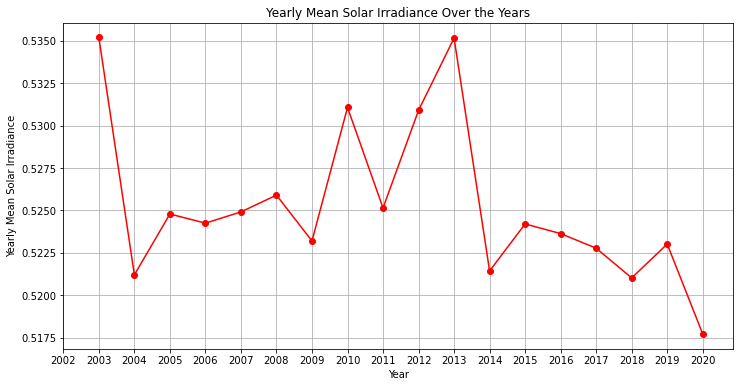

0.471013019792862


In [71]:
# Convert 'nominal_date_yyyymmdd' to a datetime index
uv_merged_data['nominal_date_yyyymmdd'] = pd.to_datetime(uv_merged_data['nominal_date_yyyymmdd'])
uv_merged_data.set_index('nominal_date_yyyymmdd', inplace=True)

# Group by year and calculate the yearly mean of sunspot number and irradiance
yearly_mean_sunspot = uv_merged_data.groupby(uv_merged_data.index.year)['sunspot_number'].mean()
yearly_mean_irradiance = uv_merged_data.groupby(uv_merged_data.index.year)['irradiance'].mean()

# Plotting the line graph for yearly mean sunspot number
plt.figure(figsize=(12, 6))
yearly_mean_sunspot.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Sunspot Number')
plt.title('Yearly Mean Sunspot Number Over the Years')
plt.grid(True)
plt.xticks(range(2002, yearly_mean_sunspot.index.max() + 1))
plt.show()

# Plotting the line graph for yearly mean solar irradiance
plt.figure(figsize=(12, 6))
yearly_mean_irradiance.plot(marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Solar Irradiance')
plt.title('Yearly Mean Solar Irradiance Over the Years')
plt.grid(True)
plt.xticks(range(2002, yearly_mean_irradiance.index.max() + 1))
plt.show()

# Calculate the correlation between sunspot numbers and solar irradiance
correlation_uv = yearly_mean_sunspot.corr(yearly_mean_irradiance)
print(correlation_uv)

In [74]:
yearly_mean_sunspot.index

Index([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020],
      dtype='int32', name='nominal_date_yyyymmdd')

C:\Users\asus\AppData\Local\Temp/ipykernel_2332/1231727112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uv_merged_data['nominal_date_yyyymmdd'] = pd.to_datetime(uv_merged_data['nominal_date_yyyymmdd'])


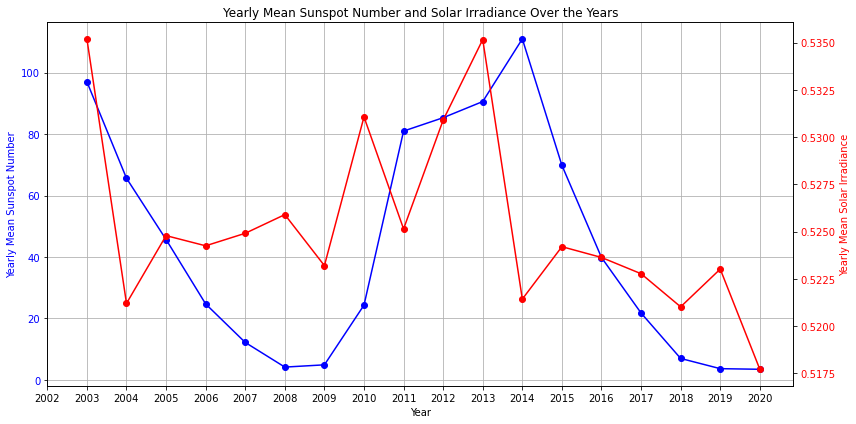

In [148]:

# Convert 'nominal_date_yyyymmdd' to a datetime index
uv_merged_data['nominal_date_yyyymmdd'] = pd.to_datetime(uv_merged_data['nominal_date_yyyymmdd'])
uv_merged_data.set_index('nominal_date_yyyymmdd', inplace=True)

# Group by year and calculate the yearly mean of sunspot number and irradiance
yearly_mean_sunspot = uv_merged_data.groupby(uv_merged_data.index.year)['sunspot_number'].mean()
yearly_mean_irradiance = uv_merged_data.groupby(uv_merged_data.index.year)['irradiance'].mean()

# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot yearly mean sunspot number on the first y-axis
ax1.plot(yearly_mean_sunspot, marker='o', linestyle='-', color='b', label='Yearly Mean Sunspot Number')
ax1.set_xlabel('Year')
ax1.set_ylabel('Yearly Mean Sunspot Number', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis to plot yearly mean solar irradiance
ax2 = ax1.twinx()
ax2.plot(yearly_mean_irradiance, marker='o', linestyle='-', color='r', label='Yearly Mean UV Solar Irradiance')
ax2.set_ylabel('Yearly Mean Solar Irradiance', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.xticks(range(2002, yearly_mean_sunspot.index.max() + 1))

# Add a title and show the plot
plt.title('Yearly Mean Sunspot Number and Solar Irradiance Over the Years')
fig.tight_layout()
plt.show()

In [149]:
# Calculate the correlation between sunspot numbers and solar irradiance
correlation_uv = yearly_mean_sunspot.corr(yearly_mean_irradiance)
print(correlation_uv)

0.471013019792862


Correlation: -0.00032265179002449203


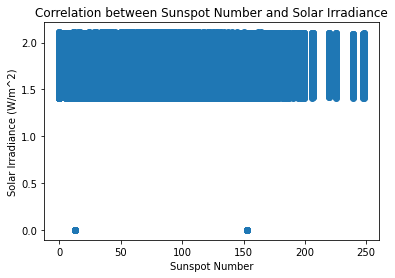

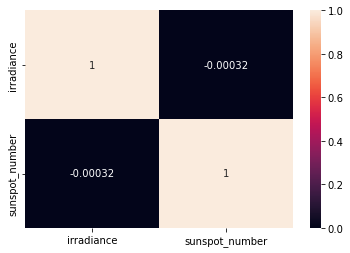

In [37]:
# VISIBLE DATA CORRELATION ANALYSIS

# Calculate the correlation between sunspot numbers and solar irradiance
correlation = visible_merged_data['sunspot_number'].corr(visible_merged_data['irradiance'])

# Print the correlation coefficient
print('Correlation:', correlation)

# Scatter plot of sunspot numbers and solar irradiance
plt.scatter(visible_merged_data['sunspot_number'], visible_merged_data['irradiance'])
plt.xlabel('Sunspot Number')
plt.ylabel('Solar Irradiance (W/m^2)')
plt.title('Correlation between Sunspot Number and Solar Irradiance')
plt.show()

sns.heatmap(visible_merged_data[['irradiance','sunspot_number']].corr(), annot = True)
plt.show()

C:\Users\asus\AppData\Local\Temp/ipykernel_2332/3268764839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visible_merged_data['nominal_date_yyyymmdd'] = pd.to_datetime(visible_merged_data['nominal_date_yyyymmdd'])


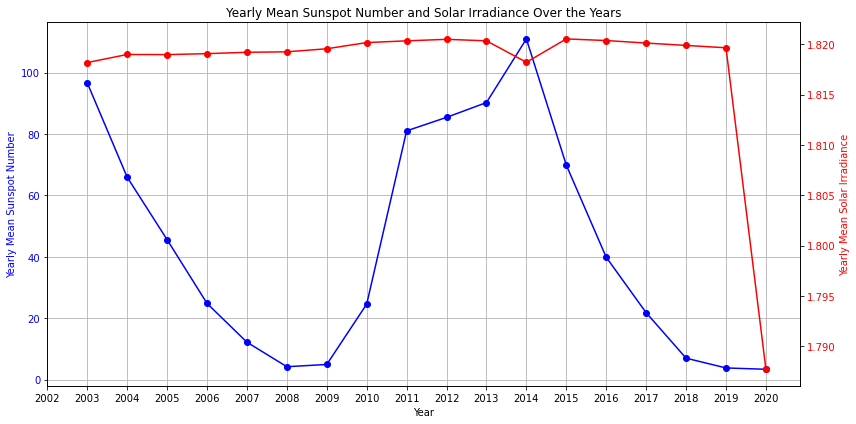

0.2582462458873497


In [151]:
# Convert 'nominal_date_yyyymmdd' to a datetime index
visible_merged_data['nominal_date_yyyymmdd'] = pd.to_datetime(visible_merged_data['nominal_date_yyyymmdd'])
visible_merged_data.set_index('nominal_date_yyyymmdd', inplace=True)

# Group by year and calculate the yearly mean of sunspot number and irradiance
yearly_mean_sunspot = visible_merged_data.groupby(visible_merged_data.index.year)['sunspot_number'].mean()
yearly_mean_irradiance = visible_merged_data.groupby(visible_merged_data.index.year)['irradiance'].mean()

# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot yearly mean sunspot number on the first y-axis
ax1.plot(yearly_mean_sunspot, marker='o', linestyle='-', color='b', label='Yearly Mean Sunspot Number')
ax1.set_xlabel('Year')
ax1.set_ylabel('Yearly Mean Sunspot Number', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis to plot yearly mean solar irradiance
ax2 = ax1.twinx()
ax2.plot(yearly_mean_irradiance, marker='o', linestyle='-', color='r', label='Yearly Mean UV Solar Irradiance')
ax2.set_ylabel('Yearly Mean Solar Irradiance', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.xticks(range(2002, yearly_mean_sunspot.index.max() + 1))

# Add a title and show the plot
plt.title('Yearly Mean Sunspot Number and Solar Irradiance Over the Years')
fig.tight_layout()
plt.show()

# Calculate the correlation between sunspot numbers and solar irradiance
correlation_visible = yearly_mean_sunspot.corr(yearly_mean_irradiance)
print(correlation_visible)

Correlation: 0.005832026929740864


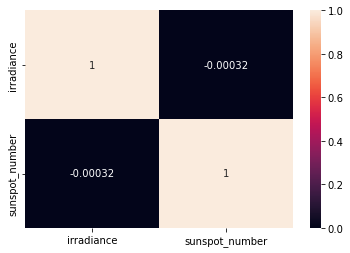

In [39]:
# INFRARED DATA CORRELATION ANALYSIS

# Calculate the correlation between sunspot numbers and solar irradiance
correlation = infrared_merged_data['sunspot_number'].corr(infrared_merged_data['irradiance'])

# Print the correlation coefficient
print('Correlation:', correlation)

# Scatter plot of sunspot numbers and solar irradiance
# plt.scatter(infrared_merged_data['sunspot_number'], infrared_merged_data['irradiance'])
# plt.xlabel('Sunspot Number')
# plt.ylabel('Solar Irradiance (W/m^2)')
# plt.title('Correlation between Sunspot Number and Solar Irradiance')
# plt.show()

sns.heatmap(visible_merged_data[['irradiance','sunspot_number']].corr(), annot = True)
plt.show()

C:\Users\asus\AppData\Local\Temp/ipykernel_2332/2212056703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infrared_merged_data['nominal_date_yyyymmdd'] = pd.to_datetime(infrared_merged_data['nominal_date_yyyymmdd'])


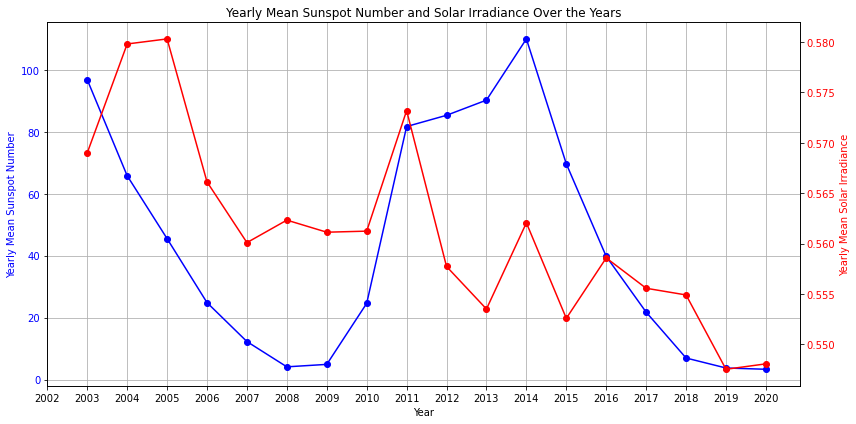

0.3312960398385701


In [153]:
# Convert 'nominal_date_yyyymmdd' to a datetime index
infrared_merged_data['nominal_date_yyyymmdd'] = pd.to_datetime(infrared_merged_data['nominal_date_yyyymmdd'])
infrared_merged_data.set_index('nominal_date_yyyymmdd', inplace=True)

# Group by year and calculate the yearly mean of sunspot number and irradiance
yearly_mean_sunspot = infrared_merged_data.groupby(infrared_merged_data.index.year)['sunspot_number'].mean()
yearly_mean_irradiance = infrared_merged_data.groupby(infrared_merged_data.index.year)['irradiance'].mean()

# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot yearly mean sunspot number on the first y-axis
ax1.plot(yearly_mean_sunspot, marker='o', linestyle='-', color='b', label='Yearly Mean Sunspot Number')
ax1.set_xlabel('Year')
ax1.set_ylabel('Yearly Mean Sunspot Number', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis to plot yearly mean solar irradiance
ax2 = ax1.twinx()
ax2.plot(yearly_mean_irradiance, marker='o', linestyle='-', color='r', label='Yearly Mean UV Solar Irradiance')
ax2.set_ylabel('Yearly Mean Solar Irradiance', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.xticks(range(2002, yearly_mean_sunspot.index.max() + 1))

# Add a title and show the plot
plt.title('Yearly Mean Sunspot Number and Solar Irradiance Over the Years')
fig.tight_layout()
plt.show()

# Calculate the correlation between sunspot numbers and solar irradiance
correlation_infrared = yearly_mean_sunspot.corr(yearly_mean_irradiance)
print(correlation_infrared)

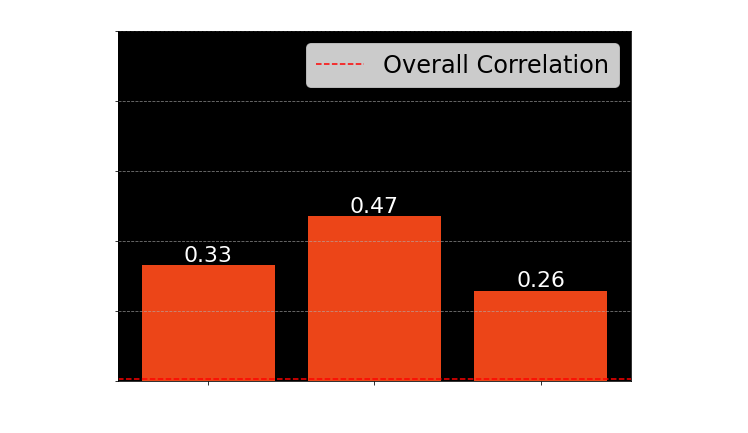

In [41]:
# Create a bar graph to show correlations over different spectra
spectra = ['Infrared', 'UV', 'Visible']
correlations = [correlation_infrared, correlation_uv, correlation_visible]


plt.figure(figsize=(8, 6))
bars = plt.bar(spectra, correlations, color='#EC4518')

# Add labels showing the correlation values on top of each bar
for bar, cr in zip(bars, correlations):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{cr:.2f}', ha='center', va='bottom', fontsize=22,color='white')


plt.xlabel('Spectrum',color='white',fontsize=16)
plt.ylabel('Correlation',color='white',fontsize=16)
plt.title('Correlation between Sunspots and SSI over Different Spectra',color='white',fontsize=24)
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(correlation, color='red', linestyle='dashed', label='Overall Correlation')
plt.legend(fontsize=24)
plt.tight_layout()

# Set the background color to black
plt.gca().set_facecolor('black')

# Set the tick label colors to white
plt.xticks(color='white', fontsize=20)
plt.yticks(color='white', fontsize=16)

# Set the title color to white
#plt.title('Correlation between Sunspots and SSI over Different Spectra', color='white')

# Create a heatmap to show overall correlations between sunspots and SSI
# heatmap_data = np.array([[correlation]])

# plt.figure(figsize=(4, 3))
# heatmap = plt.imshow(heatmap_data, cmap='coolwarm', vmin=0, vmax=1)
# plt.colorbar(heatmap, shrink=0.8, label='Correlation')
# plt.title('Overall Correlation between Sunspots and SSI')
# plt.xticks([])
# plt.yticks([])
# plt.tight_layout()

plt.show()

# cell_text = [[f'{crl:.2f}'] for crl in correlations]

# plt.figure(figsize=(8, 4))
# table = plt.table(cellText=cell_text, rowLabels=spectra, cellLoc='center', colLabels=['Correlation'], loc='center', cellColours=[['black']*1]*len(correlations), colColours=['black'], colWidths=[0.2])
# table.auto_set_font_size(False)
# table.set_fontsize(14)
# for key, cell in table.get_celld().items():
#     cell.set_edgecolor('black')
#     cell.set_text_props(color='white')

# plt.axis('off')
# plt.title('Correlation between Sunspots and SSI over Different Spectra', color='white')

# plt.tight_layout()

# # Set the background color to black
# plt.gca().set_facecolor('black')

# # Show the table
# plt.show()

In [40]:
cell_colors

NameError: name 'cell_colors' is not defined

## COSMIC RAY DATA

### Data Defination

Maurin	 Dembinski	 Gonzalez et al.	 Univ. 6	 102 (2020) [https://ui.adsabs.harvard.edu/abs/2020Univ....6..102M]							
Date: 2023/07/03-09:37:04											
Format: CSV code											
Col.1  -  QUANTITY NAME (case insensitive)											
Col.2  -  SUB-EXP NAME (case insensitive	 no space)										
Col.3  -  EAXIS TYPE: EKN	 EK	 R	 or ETOT								
Col.4  -  <E>: mean value bin [GeV/n	 GeV	 GV	 or GeV]								
Col.5  -  EBIN_LOW											
Col.6  -  EBIN_HIGH											
Col.7  -  QUANTITY VALUE: [#/sr/s/m2/EAxis] if flux 	 no unit if ratio										
Col.8  -  ERR_STAT-											
Col.9  -  ERR_STAT+											
Col.10 -  ERR_SYST-											
Col.11 -  ERR_SYST+											
Col.12 -  ADS URL FOR PAPER REF (no space)											
Col.13 -  phi [MV]											
Col.14 -  DISTANCE EXP IN SOLAR SYSTEM [AU]											
Col.15 -  DATIMES: format = yyyy/mm/dd-hhmmss:yyyy/mm/dd-hhmmss;...											
Col.16 -  IS UPPER LIMIT: format = 0 or 1											

In [54]:
cosmicFlux_data = pd.read_csv("cosmicRay_data.csv",header=0)
print(cosmicFlux_data.head())
print(cosmicFlux_data.info())
print(cosmicFlux_data.describe())

  Particle            Sub-Exp Col3  Energy  EBIN_LOW  EBIN_HIGH   Flux  \
0       He  Balloon (1950/10)  EKN   0.155     0.140      0.170  130.0   
1       He  Balloon (1950/10)  EKN   0.172     0.165      0.180  150.0   
2       He  Balloon (1950/10)  EKN   0.210     0.180      0.230  130.0   
3       He  Balloon (1950/10)  EKN   0.248     0.230      0.260  190.0   
4       He  Balloon (1954/06)  EKN   0.130     0.125      0.135  120.0   

   ERR_STAT-  ERR_STAT+  ERR_SYST-  ERR_SYST+            Paper_Ref    Phi  \
0       20.0       20.0        0.0        0.0  1957PMag....2..157F  583.9   
1       30.0       30.0        0.0        0.0  1957PMag....2..157F  583.9   
2       20.0       20.0        0.0        0.0  1957PMag....2..157F  583.9   
3       20.0       20.0        0.0        0.0  1957PMag....2..157F  583.9   
4       40.0       40.0        0.0        0.0  1958Natur.181.1319F  583.9   

    AU                           Date_Range  IS-UPPER_LIMIT  
0  1.0  1950/10/05-100000:1950

In [43]:
#cosmicFlux_data_copy
cosmicFlux_data_copy[cosmicFlux_data_copy['Duration'] == 367]

NameError: name 'cosmicFlux_data_copy' is not defined

In [44]:
# Create a copy of the DataFrame to avoid modifying the original data
cosmicFlux_data_copy = cosmicFlux_data.copy()

# Calculate flux density for each experiment and add it to the copy DataFrame
date_Range = cosmicFlux_data_copy['Date_Range'].str.extract(r'(\d{4}/\d{2}/\d{2})-\d{6}:(\d{4}/\d{2}/\d{2})-\d{6}')
cosmicFlux_data_copy['Start_Date'] = pd.to_datetime(date_Range[0], format='%Y/%m/%d')
cosmicFlux_data_copy['End_Date'] = pd.to_datetime(date_Range[1], format='%Y/%m/%d')
cosmicFlux_data_copy['Duration'] = (cosmicFlux_data_copy['End_Date'] - cosmicFlux_data_copy['Start_Date']).dt.days + 1
cosmicFlux_data_copy['Flux_Density'] = cosmicFlux_data_copy['Flux'] / cosmicFlux_data_copy['Duration']

# # Calculate the weighted mean flux for each experiment
# cosmicFlux_data_copy['Weighted_Flux'] = cosmicFlux_data_copy['Flux'] * cosmicFlux_data_copy['Duration']
# weighted_mean_flux_all = cosmicFlux_data_copy.groupby('Sub-Exp')[['Weighted_Flux', 'Duration']].sum()
# cosmicFlux_data_copy['Weighted_Mean_Flux'] = cosmicFlux_data_copy['Sub-Exp'].map(weighted_mean_flux_all['Weighted_Flux'] / weighted_mean_flux_all['Duration'])

# # # Display the modified DataFrame with the calculated weighted mean flux for each experiment
# print(cosmicFlux_data_copy)


In [45]:
# Update the 'Duration' column for the 366 days to 365 days
cosmicFlux_data_copy.loc[cosmicFlux_data_copy[cosmicFlux_data_copy['Duration'] == 366].index, 'Duration'] = 365

In [46]:
he_cosmicFlux_data = cosmicFlux_data_copy[cosmicFlux_data_copy['Particle'] == 'He']
li_cosmicFlux_data = cosmicFlux_data_copy[cosmicFlux_data_copy['Particle'] == 'Li']
h_cosmicFlux_data = cosmicFlux_data_copy[cosmicFlux_data_copy['Particle'] == 'H']

In [47]:
he_cosmicFlux_data[he_cosmicFlux_data['Duration'] < 365]

Particle                     Sub-Exp Col3  Energy  EBIN_LOW  EBIN_HIGH  \
0           He           Balloon (1950/10)  EKN  0.1550    0.1400     0.1700   
1           He           Balloon (1950/10)  EKN  0.1720    0.1650     0.1800   
2           He           Balloon (1950/10)  EKN  0.2100    0.1800     0.2300   
3           He           Balloon (1950/10)  EKN  0.2480    0.2300     0.2600   
4           He           Balloon (1954/06)  EKN  0.1300    0.1250     0.1350   
...        ...                         ...  ...     ...       ...        ...   
10655       He  Voyager2 (2019/03-2019/07)  EKN  0.2130    0.1852     0.2449   
10656       He  Voyager2 (2019/03-2019/07)  EKN  0.2602    0.2449     0.2765   
10657       He  Voyager2 (2019/03-2019/07)  EKN  0.3215    0.2765     0.3738   
10658       He  Voyager2 (2019/03-2019/07)  EKN  0.4141    0.3738     0.4588   
10659       He  Voyager2 (2019/03-2019/07)  EKN  0.5232    0.4588     0.5967   

         Flux  ERR_STAT-  ERR_STAT+  ERR_SYST-  ERR_SYST+  \
0       130.0     20.000     20.000        0.0        0.0   
1       150.0     30.000     30.000        0.0        0.0   
2       130.0     20.000     20.000        0.0        0.0   
3       190.0     20.000     20.000        0.0        0.0   
4       120.0     40.000     40.000        0.0        0.0   
...       ...        ...        ...        ...        ...   
10655  1245.0     21.800     21.800        0.0        0.0   
10656  1018.0     27.080     27.080        0.0        0.0   
10657   875.6     14.310     14.310        0.0        0.0   
10658   712.0     13.800     13.800        0.0        0.0   
10659   551.9      9.547      9.547        0.0        0.0   

                 Paper_Ref    Phi     AU                           Date_Range  \
0      1957PMag....2..157F  583.9    1.0  1950/10/05-100000:1950/10/05-140000   
1      1957PMag....2..157F  583.9    1.0  1950/10/05-100000:1950/10/05-140000   
2      1957PMag....2..157F  583.9    1.0  1950/10/05-100000:1950/10/05-140000   
3      1957PMag....2..157F  583.9    1.0  1950/10/05-100000:1950/10/05-140000   
4      1958Natur.181.1319F  583.9    1.0  1954/06/18-060000:1954/06/18-130000   
...                    ...    ...    ...                                  ...   
10655  2019NatAs...3.1013S  481.1  121.6  2019/03/11-000000:2019/06/07-000000   
10656  2019NatAs...3.1013S  481.1  121.6  2019/03/11-000000:2019/06/07-000000   
10657  2019NatAs...3.1013S  481.1  121.6  2019/03/11-000000:2019/06/07-000000   
10658  2019NatAs...3.1013S  481.1  121.6  2019/03/11-000000:2019/06/07-000000   
10659  2019NatAs...3.1013S  481.1  121.6  2019/03/11-000000:2019/06/07-000000   

       IS-UPPER_LIMIT Start_Date   End_Date  Duration  Flux_Density  
0                   0 1950-10-05 1950-10-05         1    130.000000  
1                   0 1950-10-05 1950-10-05         1    150.000000  
2                   0 1950-10-05 1950-10-05         1    130.000000  
3                   0 1950-10-05 1950-10-05         1    190.000000  
4                   0 1954-06-18 1954-06-18         1    120.000000  
...               ...        ...        ...       ...           ...  
10655               0 2019-03-11 2019-06-07        89     13.988764  
10656               0 2019-03-11 2019-06-07        89     11.438202  
10657               0 2019-03-11 2019-06-07        89      9.838202  
10658               0 2019-03-11 2019-06-07        89      8.000000  
10659               0 2019-03-11 2019-06-07        89      6.201124  

[2809 rows x 20 columns]

2809
0
67


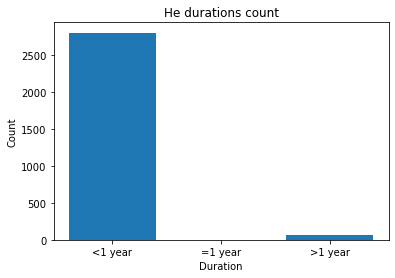

In [48]:
print(he_cosmicFlux_data[he_cosmicFlux_data['Duration'] < 365].shape[0])
print(he_cosmicFlux_data[he_cosmicFlux_data['Duration'] == 365].shape[0])
print(he_cosmicFlux_data[he_cosmicFlux_data['Duration'] > 365].shape[0])

plt.bar(['<1 year','=1 year','>1 year'],[he_cosmicFlux_data[he_cosmicFlux_data['Duration'] < 365].shape[0],
         he_cosmicFlux_data[he_cosmicFlux_data['Duration'] == 365].shape[0],
         he_cosmicFlux_data[he_cosmicFlux_data['Duration'] > 365].shape[0]])
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('He durations count')
plt.show()

#he_cosmicFlux_data[he_cosmicFlux_data['Duration'] > 365]

# Visualize the trends and patterns:
# plt.figure(figsize=(12, 6))
# plt.plot(he_cosmicFlux_data.index.values, cosmicFlux_data['Flux'].values, label='Original')
# plt.plot(cosmicFlux_data.index.values, cosmicFlux_data['Rolling_Mean'].values, label='Rolling Mean')
# plt.plot(cosmicFlux_data.index.values, cosmicFlux_data['Rolling_Std'].values, label='Rolling Std')
# plt.xlabel('Date')
# plt.ylabel('Cosmic Ray Flux')
# plt.title('Cosmic Ray Flux with Rolling Mean and Standard Deviation')
# plt.legend()
# plt.show()

7361
260
104


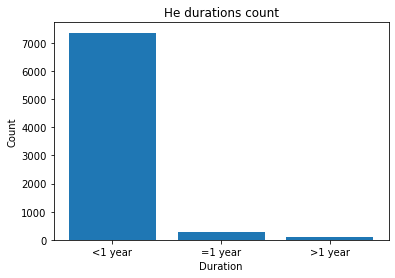

In [49]:
print(h_cosmicFlux_data[h_cosmicFlux_data['Duration'] < 365].shape[0])
print(h_cosmicFlux_data[h_cosmicFlux_data['Duration'] == 365].shape[0])
print(h_cosmicFlux_data[h_cosmicFlux_data['Duration'] > 365].shape[0])

plt.bar(['<1 year','=1 year','>1 year'],[h_cosmicFlux_data[h_cosmicFlux_data['Duration'] < 365].shape[0],
         h_cosmicFlux_data[h_cosmicFlux_data['Duration'] == 365].shape[0],
         h_cosmicFlux_data[h_cosmicFlux_data['Duration'] > 365].shape[0]])
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('He durations count')
plt.show()

In [50]:
h_cosmicFlux_data[h_cosmicFlux_data['Duration'] == 365]

Particle                  Sub-Exp Col3  Energy  EBIN_LOW  EBIN_HIGH  \
1353         H  EPHIN (1995/01-1995/12)  EKN   0.292     0.292      0.292   
1354         H  EPHIN (1995/01-1995/12)  EKN   0.336     0.336      0.336   
1355         H  EPHIN (1995/01-1995/12)  EKN   0.387     0.387      0.387   
1356         H  EPHIN (1995/01-1995/12)  EKN   0.446     0.446      0.446   
1357         H  EPHIN (1995/01-1995/12)  EKN   0.513     0.513      0.513   
...        ...                      ...  ...     ...       ...        ...   
10422        H  EPHIN (2014/01-2014/12)  EKN   0.903     0.903      0.903   
10423        H  EPHIN (2014/01-2014/12)  EKN   1.040     1.040      1.040   
10424        H  EPHIN (2014/01-2014/12)  EKN   1.198     1.198      1.198   
10425        H  EPHIN (2014/01-2014/12)  EKN   1.380     1.380      1.380   
10426        H  EPHIN (2014/01-2014/12)  EKN   1.589     1.589      1.589   

         Flux  ERR_STAT-  ERR_STAT+  ERR_SYST-  ERR_SYST+  \
1353   1960.0       19.6       19.6      392.0      392.0   
1354   1830.0       18.3       18.3      366.0      366.0   
1355   1830.0       18.3       18.3      366.0      366.0   
1356   1690.0       16.9       16.9      338.0      338.0   
1357   1700.0       17.0       17.0      340.0      340.0   
...       ...        ...        ...        ...        ...   
10422   570.0        5.7        5.7      114.0      114.0   
10423   580.0        5.8        5.8      116.0      116.0   
10424   460.0        4.6        4.6       92.0       92.0   
10425   380.0        3.8        3.8       76.0       76.0   
10426   300.0        3.0        3.0       60.0       60.0   

                 Paper_Ref    Phi   AU                           Date_Range  \
1353   2016SoPh..291..965K  610.1  1.0  1995/01/01-000000:1995/12/31-235959   
1354   2016SoPh..291..965K  610.1  1.0  1995/01/01-000000:1995/12/31-235959   
1355   2016SoPh..291..965K  610.1  1.0  1995/01/01-000000:1995/12/31-235959   
1356   2016SoPh..291..965K  610.1  1.0  1995/01/01-000000:1995/12/31-235959   
1357   2016SoPh..291..965K  610.1  1.0  1995/01/01-000000:1995/12/31-235959   
...                    ...    ...  ...                                  ...   
10422  2016SoPh..291..965K  715.2  1.0  2014/01/01-000000:2014/12/31-235959   
10423  2016SoPh..291..965K  715.2  1.0  2014/01/01-000000:2014/12/31-235959   
10424  2016SoPh..291..965K  715.2  1.0  2014/01/01-000000:2014/12/31-235959   
10425  2016SoPh..291..965K  715.2  1.0  2014/01/01-000000:2014/12/31-235959   
10426  2016SoPh..291..965K  715.2  1.0  2014/01/01-000000:2014/12/31-235959   

       IS-UPPER_LIMIT Start_Date   End_Date  Duration  Flux_Density  
1353                0 1995-01-01 1995-12-31       365      5.369863  
1354                0 1995-01-01 1995-12-31       365      5.013699  
1355                0 1995-01-01 1995-12-31       365      5.013699  
1356                0 1995-01-01 1995-12-31       365      4.630137  
1357                0 1995-01-01 1995-12-31       365      4.657534  
...               ...        ...        ...       ...           ...  
10422               0 2014-01-01 2014-12-31       365      1.561644  
10423               0 2014-01-01 2014-12-31       365      1.589041  
10424               0 2014-01-01 2014-12-31       365      1.260274  
10425               0 2014-01-01 2014-12-31       365      1.041096  
10426               0 2014-01-01 2014-12-31       365      0.821918  

[260 rows x 20 columns]

44
5
10


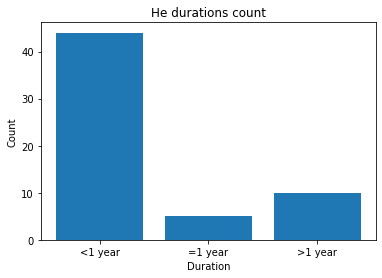

Particle                              Sub-Exp Col3      Energy  EBIN_LOW  \
60         Li                    Balloon (1957/09)  EKN    0.200000    0.1000   
61         Li                    Balloon (1957/09)  EKN    0.400000    0.3000   
62         Li                    Balloon (1957/09)  EKN    0.600000    0.5000   
209        Li               OGO1 (1965/03-1965/06)  EKN    0.044200    0.0442   
210        Li               OGO1 (1965/03-1965/06)  EKN    0.073800    0.0738   
485        Li               IMP5 (1969/06-1970/06)  EKN    0.046000    0.0330   
486        Li               IMP5 (1969/06-1970/06)  EKN    0.072000    0.0600   
487        Li               IMP5 (1969/06-1970/06)  EKN    0.095000    0.0820   
488        Li               IMP5 (1969/06-1970/06)  EKN    0.191000    0.1380   
489        Li               IMP5 (1969/06-1970/06)  EKN    0.365000    0.2510   
596        Li            Balloon (1971/09+1972/10)  EKN   21.908900   20.0000   
597        Li            Balloon (1971/09+1972/10)  EKN   26.925800   25.0000   
598        Li            Balloon (1971/09+1972/10)  EKN   33.867400   31.0000   
599        Li            Balloon (1971/09+1972/10)  EKN   47.738900   43.0000   
600        Li            Balloon (1971/09+1972/10)  EKN   74.572100   67.0000   
601        Li            Balloon (1971/09+1972/10)  EKN  119.059000  105.0000   
641        Li                    Balloon (1972/10)  EKN    2.600000    2.6000   
642        Li                    Balloon (1972/10)  EKN    3.300000    3.3000   
643        Li                    Balloon (1972/10)  EKN    4.300000    4.3000   
644        Li                    Balloon (1972/10)  EKN    5.700000    5.7000   
645        Li                    Balloon (1972/10)  EKN    8.300000    8.3000   
646        Li                    Balloon (1972/10)  EKN   12.000000   12.0000   
647        Li                    Balloon (1972/10)  EKN   18.800000   18.8000   
648        Li                    Balloon (1972/10)  EKN   33.700000   33.7000   
649        Li                    Balloon (1972/10)  EKN  147.000000  147.0000   
789        Li                Balloon UNH (1977/09)  EKN    0.170000    0.1600   
790        Li                Balloon UNH (1977/09)  EKN    0.190000    0.1700   
791        Li                Balloon UNH (1977/09)  EKN    0.200000    0.1900   
792        Li                Balloon UNH (1977/09)  EKN    0.220000    0.2100   
793        Li                Balloon UNH (1977/09)  EKN    0.250000    0.2400   
794        Li                Balloon UNH (1977/09)  EKN    0.270000    0.2600   
795        Li                Balloon UNH (1977/09)  EKN    0.290000    0.2800   
796        Li                Balloon UNH (1977/09)  EKN    0.380000    0.3700   
797        Li                Balloon UNH (1977/09)  EKN    0.410000    0.4000   
798        Li                Balloon UNH (1977/09)  EKN    0.450000    0.4300   
799        Li                Balloon UNH (1977/09)  EKN    0.490000    0.4700   
800        Li                Balloon UNH (1977/09)  EKN    0.540000    0.5200   
801        Li                Balloon UNH (1977/09)  EKN    0.580000    0.5600   
802        Li                Balloon UNH (1977/09)  EKN    0.620000    0.5900   
803        Li                Balloon UNH (1977/09)  EKN    0.670000    0.6400   
804        Li                Balloon UNH (1977/09)  EKN    0.750000    0.7000   
805        Li                Balloon UNH (1977/09)  EKN    0.840000    0.8000   
806        Li                Balloon UNH (1977/09)  EKN    0.940000    0.9000   
807        Li                Balloon UNH (1977/09)  EKN    1.070000    1.0000   
808        Li                Balloon UNH (1977/09)  EKN    1.270000    1.2100   
809        Li                Balloon UNH (1977/09)  EKN    1.470000    1.3700   
810        Li                Balloon UNH (1977/09)  EKN    1.770000    1.5900   
811        Li                Balloon UNH (1977/09)  EKN    2.210000    1.9700   
812        Li                Balloon

In [52]:
print(li_cosmicFlux_data[li_cosmicFlux_data['Duration'] < 365].shape[0])
print(li_cosmicFlux_data[li_cosmicFlux_data['Duration'] == 365].shape[0])
print(li_cosmicFlux_data[li_cosmicFlux_data['Duration'] > 366].shape[0])

plt.bar(['<1 year','=1 year','>1 year'],[li_cosmicFlux_data[li_cosmicFlux_data['Duration'] < 365].shape[0],
         li_cosmicFlux_data[li_cosmicFlux_data['Duration'] == 365].shape[0],
         li_cosmicFlux_data[li_cosmicFlux_data['Duration'] > 365].shape[0]])
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('He durations count')
plt.show()

li_cosmicFlux_data

## COMBINE SUNSPOT DATA AND COSMIC RAY DATA

In [53]:
sunspot_data.groupby(['Year', 'Month','Day'])['sunspot_number'].mean().reset_index()

Year  Month  Day  sunspot_number
0      1818      1    1            -1.0
1      1818      1    2            -1.0
2      1818      1    3            -1.0
3      1818      1    4            -1.0
4      1818      1    5            -1.0
...     ...    ...  ...             ...
75021  2023      5   27           139.0
75022  2023      5   28           146.0
75023  2023      5   29           157.0
75024  2023      5   30           165.0
75025  2023      5   31           179.0

[75026 rows x 4 columns]

In [54]:
mean_sunspot_by_year_month = sunspot_data.groupby(['Year', 'Month'])['sunspot_number'].mean().reset_index()
# mean_sunspot_by_year_month['Date'] = pd.to_datetime(mean_sunspot_by_year_month[['Year', 'Month', 'Day']])
# mean_sunspot_by_year_month[
#                 (mean_sunspot_by_year_month['Date'] >= '2019-03-23') &
#                 (mean_sunspot_by_year_month['Date'] <= '2019-04-23')]
#mean_sunspot_by_year_month
#mean_sunspot_by_year_month[mean_sunspot_by_year_month['Year']==1964]

In [55]:
# FUNCTION TO COMBINE COSMIC RAY DATA AND SUNSPOT DATA CONSIDERING YEAR AND MONTH
def calculate_mean_sunspot(row):
    if row['Duration'] == 365:
        return mean_sunspot_by_year_month.loc[
            (mean_sunspot_by_year_month['Year'] == row['Start_Date'].year) &
            (mean_sunspot_by_year_month['Month'] == row['Start_Date'].month),
            'sunspot_number'
        ].values[0]

    elif row['Duration'] < 365:
        start_year = row['Start_Date'].year
        end_year = row['End_Date'].year
        start_month = row['Start_Date'].month
        end_month = row['End_Date'].month

        if start_year == end_year:
            relevant_sunspot_data = mean_sunspot_by_year_month.loc[
                (mean_sunspot_by_year_month['Year'] == start_year) &
                (mean_sunspot_by_year_month['Month'].between(start_month, end_month)),
                'sunspot_number'
            ]
            return relevant_sunspot_data.mean()
        else:
            # Calculate the total number of months between start and end date
            total_months = (end_year - start_year) * 12 + (end_month - start_month) + 1

            # Calculate the average sunspot number for the duration
            start_year_sunspot = mean_sunspot_by_year_month.loc[
                (mean_sunspot_by_year_month['Year'] == start_year) &
                (mean_sunspot_by_year_month['Month'].ge(start_month)),
                'sunspot_number'
            ].values[0]

            end_year_sunspot = mean_sunspot_by_year_month.loc[
                (mean_sunspot_by_year_month['Year'] == end_year) &
                (mean_sunspot_by_year_month['Month'].le(end_month)),
                'sunspot_number'
            ].values[0]

            return (start_year_sunspot * (12 - start_month + 1) + end_year_sunspot * end_month) / total_months

    else:
        start_year = row['Start_Date'].year
        end_year = row['End_Date'].year
        months_in_start_year = 12 - row['Start_Date'].month + 1
        months_in_end_year = row['End_Date'].month

        total_months = months_in_start_year + 12 * (end_year - start_year - 1) + months_in_end_year

        start_year_sunspot = mean_sunspot_by_year_month.loc[
            (mean_sunspot_by_year_month['Year'] == start_year) &
            (mean_sunspot_by_year_month['Month'] == row['Start_Date'].month),
            'sunspot_number'
        ].values[0]

        end_year_sunspot = mean_sunspot_by_year_month.loc[
            (mean_sunspot_by_year_month['Year'] == end_year) &
            (mean_sunspot_by_year_month['Month'] == row['End_Date'].month),
            'sunspot_number'
        ].values[0]

        return (start_year_sunspot * months_in_start_year + end_year_sunspot * months_in_end_year) / total_months

cosmicFlux_data_copy['Mean_Sunspot_Number'] = cosmicFlux_data_copy.apply(calculate_mean_sunspot, axis=1)

# Display the final combined DataFrame
print(cosmicFlux_data_copy)

      Particle                     Sub-Exp Col3  Energy  EBIN_LOW  EBIN_HIGH  \
0           He           Balloon (1950/10)  EKN  0.1550    0.1400     0.1700   
1           He           Balloon (1950/10)  EKN  0.1720    0.1650     0.1800   
2           He           Balloon (1950/10)  EKN  0.2100    0.1800     0.2300   
3           He           Balloon (1950/10)  EKN  0.2480    0.2300     0.2600   
4           He           Balloon (1954/06)  EKN  0.1300    0.1250     0.1350   
...        ...                         ...  ...     ...       ...        ...   
10655       He  Voyager2 (2019/03-2019/07)  EKN  0.2130    0.1852     0.2449   
10656       He  Voyager2 (2019/03-2019/07)  EKN  0.2602    0.2449     0.2765   
10657       He  Voyager2 (2019/03-2019/07)  EKN  0.3215    0.2765     0.3738   
10658       He  Voyager2 (2019/03-2019/07)  EKN  0.4141    0.3738     0.4588   
10659       He  Voyager2 (2019/03-2019/07)  EKN  0.5232    0.4588     0.5967   

         Flux  ERR_STAT-  ERR_STAT+  ER

In [56]:
# Group sunspot data by Year, Month, and Day and calculate the mean sunspot number
mean_sunspot_by_year_month_day = sunspot_data.groupby(['Year', 'Month','Day'])['sunspot_number'].mean().reset_index()
mean_sunspot_by_year_month_day['Date'] = pd.to_datetime(mean_sunspot_by_year_month_day[['Year', 'Month', 'Day']])

def calculate_mean_sunspot(row):
    start_date = row['Start_Date']
    end_date = row['End_Date']
    duration = row['Duration']

    if duration == 365:
        return mean_sunspot_by_year_month_day.loc[
            (mean_sunspot_by_year_month_day['Year'] == start_date.year),
            'sunspot_number'
        ].mean()

    else:
        return mean_sunspot_by_year_month_day.loc[
            (mean_sunspot_by_year_month_day['Date'] >= start_date) &
            (mean_sunspot_by_year_month_day['Date'] <= end_date),
            'sunspot_number'
        ].mean()
        

# Apply the function to calculate mean sunspot number for each row in cosmicFlux_data_copy
cosmicFlux_data_copy['Mean_Sunspot_Number'] = cosmicFlux_data_copy.apply(calculate_mean_sunspot, axis=1)

# Display the final combined DataFrame
print(cosmicFlux_data_copy)

      Particle                     Sub-Exp Col3  Energy  EBIN_LOW  EBIN_HIGH  \
0           He           Balloon (1950/10)  EKN  0.1550    0.1400     0.1700   
1           He           Balloon (1950/10)  EKN  0.1720    0.1650     0.1800   
2           He           Balloon (1950/10)  EKN  0.2100    0.1800     0.2300   
3           He           Balloon (1950/10)  EKN  0.2480    0.2300     0.2600   
4           He           Balloon (1954/06)  EKN  0.1300    0.1250     0.1350   
...        ...                         ...  ...     ...       ...        ...   
10655       He  Voyager2 (2019/03-2019/07)  EKN  0.2130    0.1852     0.2449   
10656       He  Voyager2 (2019/03-2019/07)  EKN  0.2602    0.2449     0.2765   
10657       He  Voyager2 (2019/03-2019/07)  EKN  0.3215    0.2765     0.3738   
10658       He  Voyager2 (2019/03-2019/07)  EKN  0.4141    0.3738     0.4588   
10659       He  Voyager2 (2019/03-2019/07)  EKN  0.5232    0.4588     0.5967   

         Flux  ERR_STAT-  ERR_STAT+  ER

In [57]:
#cosmicFlux_data_copy[cosmicFlux_data_copy['Start_Date'].dt.year == 2019]
#cosmicFlux_data_copy[(cosmicFlux_data_copy['Mean_Sunspot_Number'].isnull()) & (~((cosmicFlux_data_copy['Duration']<365) & (cosmicFlux_data_copy['Duration'] > 1)))]
#cosmicFlux_data_copy[(cosmicFlux_data_copy['Duration'] < 365) & (cosmicFlux_data_copy['Duration'] > 30)]
#cosmicFlux_data_copy[(cosmicFlux_data_copy['Mean_Sunspot_Number'].isnull())]


# mean_sunspot_by_year_month_day.loc[
#             (mean_sunspot_by_year_month_day['Date'] >= '2019-03-11') & (mean_sunspot_by_year_month_day['Date'] >= '2019-06-07'),
#             'sunspot_number'
#         ].mean()

In [58]:
cosmicFlux_data_copy['Flux'].corr(cosmicFlux_data_copy['Mean_Sunspot_Number'])

-0.06841384350616675

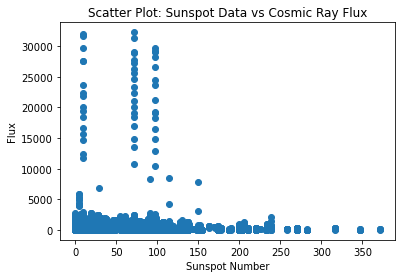

In [59]:
# Scatter plot
plt.scatter(cosmicFlux_data_copy['Mean_Sunspot_Number'],cosmicFlux_data_copy['Flux'])
plt.ylabel('Flux')
plt.xlabel('Sunspot Number')
plt.title('Scatter Plot: Sunspot Data vs Cosmic Ray Flux')
plt.show()

## EXTRA on COSMIC RAY DATA

In [60]:
#date_Range[0]
print(weighted_mean_flux_all)

NameError: name 'weighted_mean_flux_all' is not defined

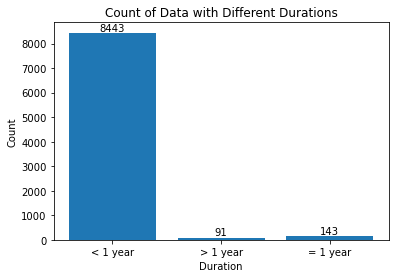

In [61]:
#cosmicFlux_data_copy.loc[(cosmicFlux_data_copy.Duration < 365)]
#cosmicFlux_data_copy.loc[(cosmicFlux_data_copy.duration < 365 2019) & (cosmicFlux_data['Particle'] == 'H'), 'Flux']

# Calculate the count of data with durations less than 1 year, greater than 1 year, and equal to 1 year
count_duration_less_than_1_year = cosmicFlux_data_copy[(cosmicFlux_data_copy['Duration'] < 365) & (cosmicFlux_data_copy['Start_Date'].dt.year > 2003)].shape[0]
count_duration_greater_than_1_year = cosmicFlux_data_copy[(cosmicFlux_data_copy['Duration'] > 365) & (cosmicFlux_data_copy['Start_Date'].dt.year > 2003)].shape[0]
count_duration_equal_to_1_year = cosmicFlux_data_copy[(cosmicFlux_data_copy['Duration'] == 365) & (cosmicFlux_data_copy['Start_Date'].dt.year > 2003)].shape[0]

# Plot the bar graph
plt.bar(['< 1 year', '> 1 year', '= 1 year'], [count_duration_less_than_1_year, count_duration_greater_than_1_year, count_duration_equal_to_1_year])
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Count of Data with Different Durations')

# Add text annotations on top of the bars
for index, value in enumerate([count_duration_less_than_1_year, count_duration_greater_than_1_year, count_duration_equal_to_1_year]):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [62]:
#Split the 'Date_Range' column into start date and end date
dates = cosmicFlux_data['Date_Range'].str.split(':', expand=True)
cosmicFlux_data['Start_Date'] = dates[0]
cosmicFlux_data['End_Date'] = dates[1]

#Split the date values based on the '-' delimiter
cosmicFlux_data['Start_Date'] = cosmicFlux_data['Start_Date'].str.split('-', expand=True)[0]
cosmicFlux_data['End_Date'] = cosmicFlux_data['End_Date'].str.split('-', expand=True)[0]

#Convert the date strings to datetime format
cosmicFlux_data['Start_Date'] = pd.to_datetime(cosmicFlux_data['Start_Date'])
cosmicFlux_data['End_Date'] = pd.to_datetime(cosmicFlux_data['End_Date'])

#Verify the dataframe with separate start date and end date columns
print(cosmicFlux_data.head())

  Particle            Sub-Exp Col3  Energy  EBIN_LOW  EBIN_HIGH   Flux  \
0       He  Balloon (1950/10)  EKN   0.155     0.140      0.170  130.0   
1       He  Balloon (1950/10)  EKN   0.172     0.165      0.180  150.0   
2       He  Balloon (1950/10)  EKN   0.210     0.180      0.230  130.0   
3       He  Balloon (1950/10)  EKN   0.248     0.230      0.260  190.0   
4       He  Balloon (1954/06)  EKN   0.130     0.125      0.135  120.0   

   ERR_STAT-  ERR_STAT+  ERR_SYST-  ERR_SYST+            Paper_Ref    Phi  \
0       20.0       20.0        0.0        0.0  1957PMag....2..157F  583.9   
1       30.0       30.0        0.0        0.0  1957PMag....2..157F  583.9   
2       20.0       20.0        0.0        0.0  1957PMag....2..157F  583.9   
3       20.0       20.0        0.0        0.0  1957PMag....2..157F  583.9   
4       40.0       40.0        0.0        0.0  1958Natur.181.1319F  583.9   

    AU                           Date_Range  IS-UPPER_LIMIT Start_Date  \
0  1.0  1950/10/05

In [63]:
cosmicFlux_data

Particle                     Sub-Exp Col3  Energy  EBIN_LOW  EBIN_HIGH  \
0           He           Balloon (1950/10)  EKN  0.1550    0.1400     0.1700   
1           He           Balloon (1950/10)  EKN  0.1720    0.1650     0.1800   
2           He           Balloon (1950/10)  EKN  0.2100    0.1800     0.2300   
3           He           Balloon (1950/10)  EKN  0.2480    0.2300     0.2600   
4           He           Balloon (1954/06)  EKN  0.1300    0.1250     0.1350   
...        ...                         ...  ...     ...       ...        ...   
10655       He  Voyager2 (2019/03-2019/07)  EKN  0.2130    0.1852     0.2449   
10656       He  Voyager2 (2019/03-2019/07)  EKN  0.2602    0.2449     0.2765   
10657       He  Voyager2 (2019/03-2019/07)  EKN  0.3215    0.2765     0.3738   
10658       He  Voyager2 (2019/03-2019/07)  EKN  0.4141    0.3738     0.4588   
10659       He  Voyager2 (2019/03-2019/07)  EKN  0.5232    0.4588     0.5967   

         Flux  ERR_STAT-  ERR_STAT+  ERR_SYST-  ERR_SYST+  \
0       130.0     20.000     20.000        0.0        0.0   
1       150.0     30.000     30.000        0.0        0.0   
2       130.0     20.000     20.000        0.0        0.0   
3       190.0     20.000     20.000        0.0        0.0   
4       120.0     40.000     40.000        0.0        0.0   
...       ...        ...        ...        ...        ...   
10655  1245.0     21.800     21.800        0.0        0.0   
10656  1018.0     27.080     27.080        0.0        0.0   
10657   875.6     14.310     14.310        0.0        0.0   
10658   712.0     13.800     13.800        0.0        0.0   
10659   551.9      9.547      9.547        0.0        0.0   

                 Paper_Ref    Phi     AU                           Date_Range  \
0      1957PMag....2..157F  583.9    1.0  1950/10/05-100000:1950/10/05-140000   
1      1957PMag....2..157F  583.9    1.0  1950/10/05-100000:1950/10/05-140000   
2      1957PMag....2..157F  583.9    1.0  1950/10/05-100000:1950/10/05-140000   
3      1957PMag....2..157F  583.9    1.0  1950/10/05-100000:1950/10/05-140000   
4      1958Natur.181.1319F  583.9    1.0  1954/06/18-060000:1954/06/18-130000   
...                    ...    ...    ...                                  ...   
10655  2019NatAs...3.1013S  481.1  121.6  2019/03/11-000000:2019/06/07-000000   
10656  2019NatAs...3.1013S  481.1  121.6  2019/03/11-000000:2019/06/07-000000   
10657  2019NatAs...3.1013S  481.1  121.6  2019/03/11-000000:2019/06/07-000000   
10658  2019NatAs...3.1013S  481.1  121.6  2019/03/11-000000:2019/06/07-000000   
10659  2019NatAs...3.1013S  481.1  121.6  2019/03/11-000000:2019/06/07-000000   

       IS-UPPER_LIMIT Start_Date   End_Date  
0                   0 1950-10-05 1950-10-05  
1                   0 1950-10-05 1950-10-05  
2                   0 1950-10-05 1950-10-05  
3                   0 1950-10-05 1950-10-05  
4                   0 1954-06-18 1954-06-18  
...               ...        ...        ...  
10655               0 2019-03-11 2019-06-07  
10656               0 2019-03-11 2019-06-07  
10657               0 2019-03-11 2019-06-07  
10658               0 2019-03-11 2019-06-07  
10659               0 2019-03-11 2019-06-07  

[10660 rows x 18 columns]

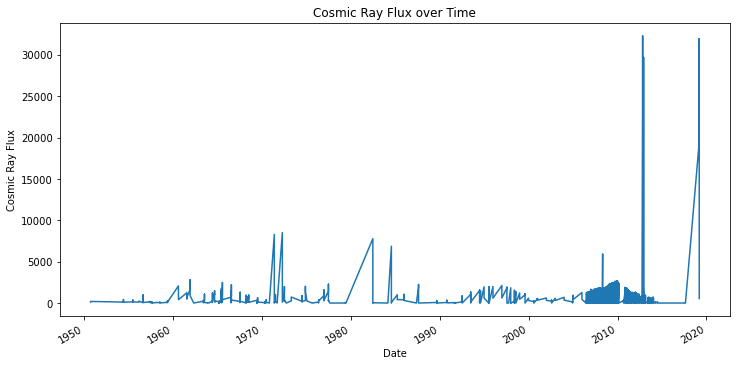

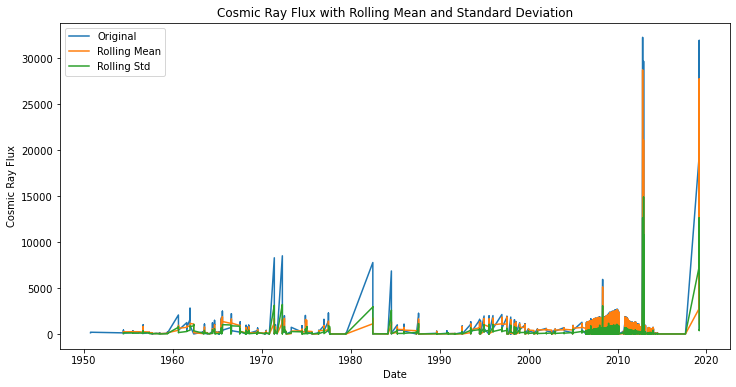

In [64]:
# Set the index of the dataframe to the 'Start_Date' column
cosmicFlux_data.set_index('Start_Date', inplace=True)

# Plot the time series data
cosmicFlux_data['Flux'].plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Cosmic Ray Flux')
plt.title('Cosmic Ray Flux over Time')
plt.show()

# Calculate the rolling mean and standard deviation
cosmicFlux_data['Rolling_Mean'] = cosmicFlux_data['Flux'].rolling(window=7).mean()
cosmicFlux_data['Rolling_Std'] = cosmicFlux_data['Flux'].rolling(window=7).std()

# Visualize the trends and patterns:
plt.figure(figsize=(12, 6))
plt.plot(cosmicFlux_data.index.values, cosmicFlux_data['Flux'].values, label='Original')
plt.plot(cosmicFlux_data.index.values, cosmicFlux_data['Rolling_Mean'].values, label='Rolling Mean')
plt.plot(cosmicFlux_data.index.values, cosmicFlux_data['Rolling_Std'].values, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Cosmic Ray Flux')
plt.title('Cosmic Ray Flux with Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

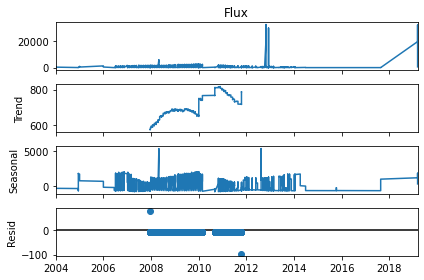

ADF Statistic: -13.04667804332847
p-value: 2.1844524493957963e-24
Critical Values:
1%: -3.4311071760751575
5%: -2.8618746209792243
10%: -2.5669481138040715


In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

comicFlux_data_backup = cosmicFlux_data.copy()

cosmicFlux_data = cosmicFlux_data[cosmicFlux_data.index.year > 2003]
# Decomposing the time series
decomposition = seasonal_decompose(cosmicFlux_data['Flux'], model='additive', period=int(len(cosmicFlux_data)/2))

# Plotting the decomposed components
decomposition.plot()
plt.show()

from statsmodels.tsa.stattools import adfuller

# Performing Augmented Dickey-Fuller test for stationarity
result = adfuller(cosmicFlux_data['Flux'])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

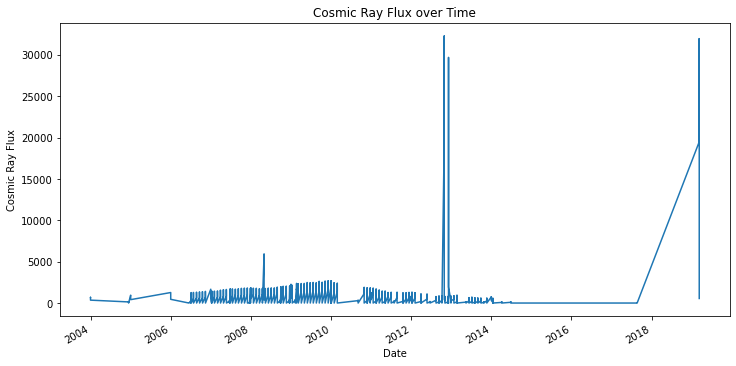

In [66]:
cosmicFlux_data[cosmicFlux_data['Flux'] > 1 ]
# Plot the time series data
cosmicFlux_data['Flux'].plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Cosmic Ray Flux')
plt.title('Cosmic Ray Flux over Time')
plt.show()

In [67]:
cosmicFlux_data.loc[(cosmicFlux_data.index.year == 2019) & (cosmicFlux_data['Particle'] == 'H'), 'Flux']

Start_Date
2019-03-11    19490.0
2019-03-11    22410.0
2019-03-11    23600.0
2019-03-11    27590.0
2019-03-11    29670.0
2019-03-11    31960.0
2019-03-11    31590.0
2019-03-11    27630.0
2019-03-11    21840.0
2019-03-11    20020.0
2019-03-11    18380.0
2019-03-11    16660.0
2019-03-11    15730.0
2019-03-11    14710.0
2019-03-11    12380.0
2019-03-11    11760.0
Name: Flux, dtype: float64

In [68]:
# Fill missing years and set the index to the 'Start_Date' column
date_range = pd.date_range(start=cosmicFlux_data.index.min(), end=cosmicFlux_data['End_Date'].max(), freq='D')
cosmicFlux_data = cosmicFlux_data.set_index('Start_Date').reindex(date_range)

# Plot the time series data
cosmicFlux_data['Flux'].plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Cosmic Ray Flux')
plt.title('Cosmic Ray Flux over Time')
plt.show()

# Fill missing values in the 'Flux' column using forward fill method
cosmicFlux_data['Flux'].ffill(inplace=True)

# Calculate the rolling mean and standard deviation
cosmicFlux_data['Rolling_Mean'] = cosmicFlux_data['Flux'].rolling(window=7).mean()
cosmicFlux_data['Rolling_Std'] = cosmicFlux_data['Flux'].rolling(window=7).std()

# Visualize the trends and patterns:
plt.figure(figsize=(12, 6))
plt.plot(cosmicFlux_data.index.values, cosmicFlux_data['Flux'].values, label='Original')
plt.plot(cosmicFlux_data.index.values, cosmicFlux_data['Rolling_Mean'].values, label='Rolling Mean')
plt.plot(cosmicFlux_data.index.values, cosmicFlux_data['Rolling_Std'].values, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Cosmic Ray Flux')
plt.title('Cosmic Ray Flux with Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

# Decomposing the time series
decomposition = seasonal_decompose(cosmicFlux_data['Flux'], model='additive', period=int(len(cosmicFlux_data)/2))

# Plotting the decomposed components
decomposition.plot()
plt.show()

# Performing Augmented Dickey-Fuller test for stationarity
result = adfuller(cosmicFlux_data['Flux'].dropna())  # Drop NA values for the test
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

KeyError: "None of ['Start_Date'] are in the columns"

In [69]:
#comicFlux_data_backup.reset_index(inplace=True)
comicFlux_data_backup

Particle                     Sub-Exp Col3  Energy  EBIN_LOW  \
Start_Date                                                               
1950-10-05       He           Balloon (1950/10)  EKN  0.1550    0.1400   
1950-10-05       He           Balloon (1950/10)  EKN  0.1720    0.1650   
1950-10-05       He           Balloon (1950/10)  EKN  0.2100    0.1800   
1950-10-05       He           Balloon (1950/10)  EKN  0.2480    0.2300   
1954-06-18       He           Balloon (1954/06)  EKN  0.1300    0.1250   
...             ...                         ...  ...     ...       ...   
2019-03-11       He  Voyager2 (2019/03-2019/07)  EKN  0.2130    0.1852   
2019-03-11       He  Voyager2 (2019/03-2019/07)  EKN  0.2602    0.2449   
2019-03-11       He  Voyager2 (2019/03-2019/07)  EKN  0.3215    0.2765   
2019-03-11       He  Voyager2 (2019/03-2019/07)  EKN  0.4141    0.3738   
2019-03-11       He  Voyager2 (2019/03-2019/07)  EKN  0.5232    0.4588   

            EBIN_HIGH    Flux  ERR_STAT-  ERR_STAT+  ERR_SYST-  ERR_SYST+  \
Start_Date                                                                  
1950-10-05     0.1700   130.0     20.000     20.000        0.0        0.0   
1950-10-05     0.1800   150.0     30.000     30.000        0.0        0.0   
1950-10-05     0.2300   130.0     20.000     20.000        0.0        0.0   
1950-10-05     0.2600   190.0     20.000     20.000        0.0        0.0   
1954-06-18     0.1350   120.0     40.000     40.000        0.0        0.0   
...               ...     ...        ...        ...        ...        ...   
2019-03-11     0.2449  1245.0     21.800     21.800        0.0        0.0   
2019-03-11     0.2765  1018.0     27.080     27.080        0.0        0.0   
2019-03-11     0.3738   875.6     14.310     14.310        0.0        0.0   
2019-03-11     0.4588   712.0     13.800     13.800        0.0        0.0   
2019-03-11     0.5967   551.9      9.547      9.547        0.0        0.0   

                      Paper_Ref    Phi     AU  \
Start_Date                                      
1950-10-05  1957PMag....2..157F  583.9    1.0   
1950-10-05  1957PMag....2..157F  583.9    1.0   
1950-10-05  1957PMag....2..157F  583.9    1.0   
1950-10-05  1957PMag....2..157F  583.9    1.0   
1954-06-18  1958Natur.181.1319F  583.9    1.0   
...                         ...    ...    ...   
2019-03-11  2019NatAs...3.1013S  481.1  121.6   
2019-03-11  2019NatAs...3.1013S  481.1  121.6   
2019-03-11  2019NatAs...3.1013S  481.1  121.6   
2019-03-11  2019NatAs...3.1013S  481.1  121.6   
2019-03-11  2019NatAs...3.1013S  481.1  121.6   

                                     Date_Range  IS-UPPER_LIMIT   End_Date  \
Start_Date                                                                   
1950-10-05  1950/10/05-100000:1950/10/05-140000               0 1950-10-05   
1950-10-05  1950/10/05-100000:1950/10/05-140000               0 1950-10-05   
1950-10-05  1950/10/05-100000:1950/10/05-140000               0 1950-10-05   
1950-10-05  1950/10/05-100000:1950/10/05-140000               0 1950-10-05   
1954-06-18  1954/06/18-060000:1954/06/18-130000               0 1954-06-18   
...                                         ...             ...        ...   
2019-03-11  2019/03/11-000000:2019/06/07-000000               0 2019-06-07   
2019-03-11  2019/03/11-000000:2019/06/07-000000               0 2019-06-07   
2019-03-11  2019/03/11-000000:2019/06/07-000000               0 2019-06-07   
2019-03-11  2019/03/11-000000:2019/06/07-000000               0 2019-06-07   
2019-03-11  2019/03/11-000000:2019/06/07-000000               0 2019-06-07   

            Rolling_Mean  Rolling_Std  
Start_Date                             
1950-10-05           NaN          NaN  
1950-10-05           NaN          NaN  
1950-10-05           NaN          NaN  
1950-10-05           NaN          NaN  
1954-06-18           NaN          NaN  
...                  ...          ...  
2019-03-11   2029.714286   590.905157  
2019-03-11   1746.142857   517.75

### COSMIC RAY DATA FROM OULU STATION

In [55]:
cc_oulu = pd.read_csv("OULU_1976-202.csv")
print(cc_oulu.head())
print(cc_oulu.info())
print(cc_oulu.describe())

              Timestamp  FractionalDate  UncorrectedCountRate[cts/min]  \
0  1976-01-01T00:00:00Z     1976.000000                           7671   
1  1976-01-02T00:00:00Z     1976.002732                           6706   
2  1976-01-03T00:00:00Z     1976.005465                           6353   
3  1976-01-04T00:00:00Z     1976.008197                           6426   
4  1976-01-05T00:00:00Z     1976.010929                           6377   

   CorrectedCountRate[cts/min]  Pressure[mbar]  
0                         6480          977.21  
1                         6430          994.50  
2                         6437         1001.78  
3                         6428         1000.05  
4                         6399         1000.50  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                   

In [56]:
print(cc_oulu.isnull().sum())

Timestamp                        0
FractionalDate                   0
UncorrectedCountRate[cts/min]    0
CorrectedCountRate[cts/min]      0
Pressure[mbar]                   0
dtype: int64


In [59]:
# Convert the 'nominal_date_yyyymmdd' column to datetime format
cc_oulu['Timestamp'] = pd.to_datetime(cc_oulu['Timestamp'], format='%Y%m%d')

In [62]:
cc_oulu['Timestamp']

0       1976-01-01 00:00:00+00:00
1       1976-01-02 00:00:00+00:00
2       1976-01-03 00:00:00+00:00
3       1976-01-04 00:00:00+00:00
4       1976-01-05 00:00:00+00:00
                   ...           
16432   2020-12-27 00:00:00+00:00
16433   2020-12-28 00:00:00+00:00
16434   2020-12-29 00:00:00+00:00
16435   2020-12-30 00:00:00+00:00
16436   2020-12-31 00:00:00+00:00
Name: Timestamp, Length: 16437, dtype: datetime64[ns, UTC]

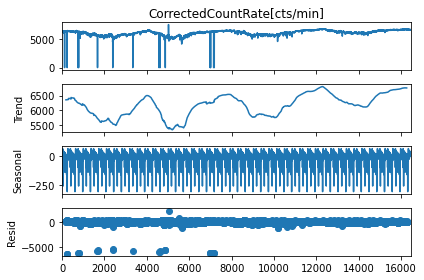

ADF Statistic: -14.768543239380381
p-value: 2.341930935532955e-27
Critical Values:
1%: -3.4309659021946257
5%: -2.861812193882933
10%: -2.5669148836629887


In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

cc_oulu_backup = cc_oulu.copy()

# Decomposing the time series
decomposition = seasonal_decompose(cc_oulu_backup['CorrectedCountRate[cts/min]'], model='additive', period=365)

# Plotting the decomposed components
decomposition.plot()
plt.show()

from statsmodels.tsa.stattools import adfuller

# Performing Augmented Dickey-Fuller test for stationarity
result = adfuller(cosmicFlux_data['Flux'])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

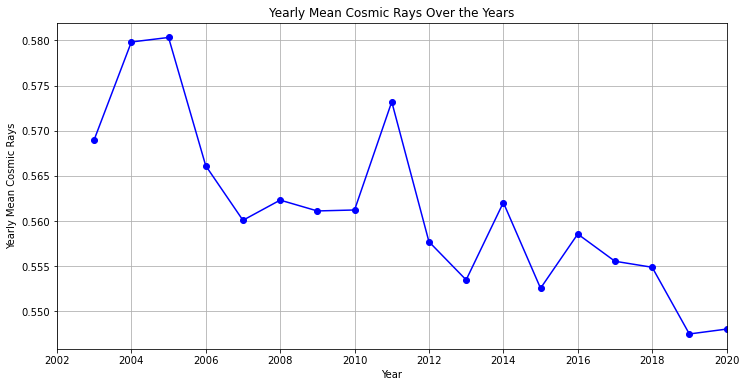

In [63]:
# Group by year and calculate the yearly mean of irradiance
yearly_mean_cc = cc_oulu.groupby(cc_oulu['Timestamp'].dt.year)['CorrectedCountRate[cts/min]'].mean()

# Plotting the line graph for each year
plt.figure(figsize=(12, 6))
yearly_mean.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Cosmic Rays')
plt.title('Yearly Mean Cosmic Rays Over the Years')
plt.grid(True)
plt.xlim(2002,2020)
plt.show()

In [154]:
sunspot_daily = sunspot_data.groupby(['Year', 'Month','Day'])['sunspot_number'].mean().reset_index()
sunspot_daily

Year  Month  Day  sunspot_number
0      1818      1    8            65.0
1      1818      1   13            37.0
2      1818      1   17            77.0
3      1818      1   18            98.0
4      1818      1   19           105.0
...     ...    ...  ...             ...
71774  2023      5   27           139.0
71775  2023      5   28           146.0
71776  2023      5   29           157.0
71777  2023      5   30           165.0
71778  2023      5   31           179.0

[71779 rows x 4 columns]

In [155]:
cc_oulu['Timestamp'] = pd.to_datetime(cc_oulu['Timestamp'])

In [156]:
oulu_cr_sunspot = pd.merge(cc_oulu,sunspot_daily,left_on=[cc_oulu['Timestamp'].dt.year,cc_oulu['Timestamp'].dt.month,cc_oulu['Timestamp'].dt.day],
        right_on=['Year','Month','Day'])
oulu_cr_sunspot.head()

Timestamp  FractionalDate  UncorrectedCountRate[cts/min]  \
0 1976-01-01 00:00:00+00:00     1976.000000                           7671   
1 1976-01-02 00:00:00+00:00     1976.002732                           6706   
2 1976-01-03 00:00:00+00:00     1976.005465                           6353   
3 1976-01-04 00:00:00+00:00     1976.008197                           6426   
4 1976-01-05 00:00:00+00:00     1976.010929                           6377   

   CorrectedCountRate[cts/min]  Pressure[mbar]  Year  Month  Day  \
0                         6480          977.21  1976      1    1   
1                         6430          994.50  1976      1    2   
2                         6437         1001.78  1976      1    3   
3                         6428         1000.05  1976      1    4   
4                         6399         1000.50  1976      1    5   

   sunspot_number  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

In [157]:
oulu_cr_sunspot['CorrectedCountRate[cts/min]'].corr(oulu_cr_sunspot['sunspot_number'])

-0.6227309248227618

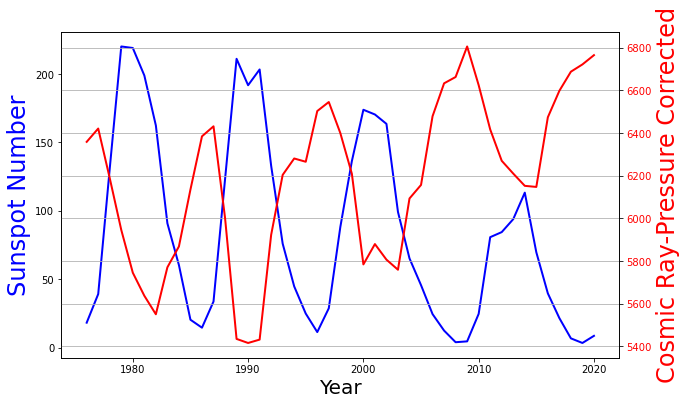

In [162]:
yearly_mean_sunspot = oulu_cr_sunspot.groupby(oulu_cr_sunspot['Year'])['sunspot_number'].mean()
yearly_mean_oulu_cr = oulu_cr_sunspot.groupby(oulu_cr_sunspot['Year'])['CorrectedCountRate[cts/min]'].mean()

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the line for sunspot numbers on the left y-axis (ax1)
ax1.plot(yearly_mean_sunspot.index.values, yearly_mean_sunspot.values, linestyle='-', color='b', linewidth=2,
        label='Sunspots')
ax1.set_xlabel('Year',fontsize=20,color='black')
ax1.set_ylabel('Sunspot Number',fontsize=24,color='b')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis on the right side for cloud properties
ax2 = ax1.twinx()

# Plot the line for cloud properties on the right y-axis (ax2)
ax2.plot(yearly_mean_oulu_cr.index.values, yearly_mean_oulu_cr.values, linestyle='-', 
         color='r', linewidth=2)
ax2.set_ylabel('Cosmic Ray-Pressure Corrected', fontsize=24, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
plt.title('Sunspot Number vs Cosmic Ray',fontsize=24, color='w')
plt.grid(True)

plt.show()

## Climate data

In [2]:
#pip install xarray

  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3Note: you may need to restart the kernel to use updated packages.
    Uninstalling numpy-1.20.3:



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.


      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.25.0 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.25.0 which is incompatible.


In [6]:
#pip install daal4py scipy numba

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [8]:
#pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [76]:
import xarray as xr
ds = xr.open_mfdataset(['/Dissertation/AVHRR_METOPA/2007/200707-ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_METOPA-fv3.0.nc','/Dissertation/AVHRR_METOPA/2007/200708-ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_METOPA-fv3.0.nc'])
ds

<xarray.Dataset>
Dimensions:                       (lat: 360, lon: 720, time: 2,
                                   hist2d_cot_bin_border: 14,
                                   hist2d_cot_bin_centre: 13,
                                   hist2d_ctp_bin_border: 16,
                                   hist2d_ctp_bin_centre: 15, hist_phase: 2,
                                   hist1d_cot_bin_border: 15,
                                   ...
                                   hist1d_cwp_bin_border: 15,
                                   hist1d_cwp_bin_centre: 14,
                                   hist1d_ctp_bin_border: 16,
                                   hist1d_ctp_bin_centre: 15,
                                   hist1d_ctt_bin_border: 17,
                                   hist1d_ctt_bin_centre: 16)
Coordinates: (12/22)
  * lat                           (lat) float32 -89.75 -89.25 ... 89.25 89.75
  * lon                           (lon) float32 -179.8 -179.2 ... 179.2 179.8
  * time                          (time) datetime64[ns] 2007-07-01 2007-08-01
  * hist2d_cot_bin_border         (hist2d_cot_bin_border) float32 0.0 ... 100.0
  * hist2d_cot_bin_centre         (hist2d_cot_bin_centre) float32 0.15 ... 90.0
  * hist2d_ctp_bin_border         (hist2d_ctp_bin_border) float32 1.0 ... 1.1...
    ...                            ...
  * hist1d_cwp_bin_border         (hist1d_cwp_bin_border) float32 0.0 ... 1e+05
  * hist1d_cwp_bin_centre         (hist1d_cwp_bin_centre) float32 2.5 ... 5.1...
  * hist1d_ctp_bin_border         (hist1d_ctp_bin_border) float32 1.0 ... 1.1...
  * hist1d_ctp_bin_centre         (hist1d_ctp_bin_centre) float32 45.5 ... 1....
  * hist1d_ctt_bin_border         (hist1d_ctt_bin_border) float32 200.0 ... 3...
  * hist1d_ctt_bin_centre         (hist1d_ctt_bin_centre) float32 205.0 ... 3...
Data variables: (12/180)
    nobs                          (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_day                      (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_clear_day                (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_cloudy_day               (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_clear_night              (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_cloudy_night             (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    ...                            ...
    hist1d_ctp                    (time, hist_phase, hist1d_ctp_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 15, 360, 720), meta=np.ndarray>
    hist1d_ctt                    (time, hist_phase, hist1d_ctt_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 16, 360, 720), meta=np.ndarray>
    hist1d_cer                    (time, hist_phase, hist1d_cer_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 11, 360, 720), meta=np.ndarray>
    hist1d_cwp                    (time, hist_phase, hist1d_cwp_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 14, 360, 720), meta=np.ndarray>
    hist1d_cla_vis006             (time, hist_phase, hist1d_cla_vis006_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 13, 360, 720), meta=np.ndarray>
    hist1d_cla_vis008             (time, hist_phase, hist1d_cla_vis008_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 13, 360, 720), meta=np.ndarray>
Attributes: (12/40)
    title:                       ESA Cloud CCI Retrieval Products L3 Output File
    project:                     Climate Change Initiative - European Space A...
    product_version:             3.0
    Conventions:                 CF-1.6,ACDD-1.3
    standard_name_vocabulary:    Standard name table (v29, 08 July 2015)
    institution:                 Deutscher Wetterdienst
    ...                          ...
    keywords:                    EARTH SCIENCE > ATMOSP

In [77]:
ds['cfc'].to_dataframe()

cfc
time       lat    lon              
2007-07-01 -89.75 -179.75  0.285714
                  -179.25  0.309942
                  -178.75  0.282051
                  -178.25  0.238372
                  -177.75  0.202247
...                             ...
2007-08-01  89.75  177.75  0.807229
                   178.25  0.859060
                   178.75  0.802632
                   179.25  0.807292
                   179.75  0.811429

[518400 rows x 1 columns]

In [78]:
ds['cee'].to_dataframe()

cee
time       lat    lon              
2007-07-01 -89.75 -179.75  0.593588
                  -179.25  0.539409
                  -178.75  0.645436
                  -178.25  0.617607
                  -177.75  0.604753
...                             ...
2007-08-01  89.75  177.75  0.812517
                   178.25  0.876453
                   178.75  0.813458
                   179.25  0.869897
                   179.75  0.802720

[518400 rows x 1 columns]

In [79]:
ds['cla_vis006'].to_dataframe()

cla_vis006
time       lat    lon                
2007-07-01 -89.75 -179.75         NaN
                  -179.25         NaN
                  -178.75         NaN
                  -178.25         NaN
                  -177.75         NaN
...                               ...
2007-08-01  89.75  177.75    0.576670
                   178.25    0.632912
                   178.75    0.638648
                   179.25    0.659372
                   179.75    0.620163

[518400 rows x 1 columns]

In [80]:
ds['cla_vis008'].to_dataframe().reset_index()

time    lat     lon  cla_vis008
0      2007-07-01 -89.75 -179.75         NaN
1      2007-07-01 -89.75 -179.25         NaN
2      2007-07-01 -89.75 -178.75         NaN
3      2007-07-01 -89.75 -178.25         NaN
4      2007-07-01 -89.75 -177.75         NaN
...           ...    ...     ...         ...
518395 2007-08-01  89.75  177.75    0.567907
518396 2007-08-01  89.75  178.25    0.626347
518397 2007-08-01  89.75  178.75    0.633300
518398 2007-08-01  89.75  179.25    0.656603
518399 2007-08-01  89.75  179.75    0.613674

[518400 rows x 4 columns]

In [83]:
import xarray as xr
ds_all = xr.open_mfdataset('/Dissertation/AVHRR_COMBINED/*.nc',parallel=True)
ds_all

<xarray.Dataset>
Dimensions:                       (lat: 360, lon: 720, time: 144,
                                   hist2d_cot_bin_border: 14,
                                   hist2d_cot_bin_centre: 13,
                                   hist2d_ctp_bin_border: 16,
                                   hist2d_ctp_bin_centre: 15, hist_phase: 2,
                                   hist1d_cot_bin_border: 15,
                                   ...
                                   hist1d_cwp_bin_border: 15,
                                   hist1d_cwp_bin_centre: 14,
                                   hist1d_ctp_bin_border: 16,
                                   hist1d_ctp_bin_centre: 15,
                                   hist1d_ctt_bin_border: 17,
                                   hist1d_ctt_bin_centre: 16)
Coordinates: (12/22)
  * lat                           (lat) float32 -89.75 -89.25 ... 89.25 89.75
  * lon                           (lon) float32 -179.8 -179.2 ... 179.2 179.8
  * time                          (time) datetime64[ns] 2003-01-01 ... 2014-1...
  * hist2d_cot_bin_border         (hist2d_cot_bin_border) float32 0.0 ... 100.0
  * hist2d_cot_bin_centre         (hist2d_cot_bin_centre) float32 0.15 ... 90.0
  * hist2d_ctp_bin_border         (hist2d_ctp_bin_border) float32 1.0 ... 1.1...
    ...                            ...
  * hist1d_cwp_bin_border         (hist1d_cwp_bin_border) float32 0.0 ... 1e+05
  * hist1d_cwp_bin_centre         (hist1d_cwp_bin_centre) float32 2.5 ... 5.1...
  * hist1d_ctp_bin_border         (hist1d_ctp_bin_border) float32 1.0 ... 1.1...
  * hist1d_ctp_bin_centre         (hist1d_ctp_bin_centre) float32 45.5 ... 1....
  * hist1d_ctt_bin_border         (hist1d_ctt_bin_border) float32 200.0 ... 3...
  * hist1d_ctt_bin_centre         (hist1d_ctt_bin_centre) float32 205.0 ... 3...
Data variables: (12/180)
    nobs                          (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_day                      (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_clear_day                (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_cloudy_day               (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_clear_night              (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_cloudy_night             (time, lat, lon) float64 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    ...                            ...
    hist1d_ctp                    (time, hist_phase, hist1d_ctp_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 15, 360, 720), meta=np.ndarray>
    hist1d_ctt                    (time, hist_phase, hist1d_ctt_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 16, 360, 720), meta=np.ndarray>
    hist1d_cer                    (time, hist_phase, hist1d_cer_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 11, 360, 720), meta=np.ndarray>
    hist1d_cwp                    (time, hist_phase, hist1d_cwp_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 14, 360, 720), meta=np.ndarray>
    hist1d_cla_vis006             (time, hist_phase, hist1d_cla_vis006_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 13, 360, 720), meta=np.ndarray>
    hist1d_cla_vis008             (time, hist_phase, hist1d_cla_vis008_bin_centre, lat, lon) float64 dask.array<chunksize=(1, 2, 13, 360, 720), meta=np.ndarray>
Attributes: (12/40)
    title:                       ESA Cloud CCI Retrieval Products L3 Output File
    project:                     Climate Change Initiative - European Space A...
    product_version:             3.0
    Conventions:                 CF-1.6,ACDD-1.3
    standard_name_vocabulary:    Standard name table (v29, 08 July 2015)
    institution:                 Deutscher Wetterdienst
    ...                          ...
    keywords:                    EARTH SCIENCE > A

In [84]:
ds_all[['cfc','ctt','stemp_cloudy','cth','ctp','cer','cot','cee','cla_vis008','cla_vis006']].to_dataframe().reset_index()

time    lat     lon       cfc         ctt  stemp_cloudy  \
0        2003-01-01 -89.75 -179.75  0.537500  240.100113    248.052536   
1        2003-01-01 -89.75 -179.25  0.497076  241.568680    248.960007   
2        2003-01-01 -89.75 -178.75  0.538922  240.683121    248.078888   
3        2003-01-01 -89.75 -178.25  0.573171  240.943192    247.997986   
4        2003-01-01 -89.75 -177.75  0.519231  240.589630    248.677521   
...             ...    ...     ...       ...         ...           ...   
37324795 2014-12-01  89.75  177.75  0.457627  245.482803    255.690659   
37324796 2014-12-01  89.75  178.25  0.447059  243.015427    256.586182   
37324797 2014-12-01  89.75  178.75  0.373563  244.588928    254.755768   
37324798 2014-12-01  89.75  179.25  0.466667  246.481735    256.416443   
37324799 2014-12-01  89.75  179.75  0.463277  243.202316    255.815460   

               cth         ctp        cer       cot       cee  cla_vis008  \
0         4.785116  540.918579  36.311275  2.702326  0.766702    0.433196   
1         4.564642  556.538086  30.250355  7.445952  0.809180    0.482249   
2         4.687555  547.352173  38.829113  8.455777  0.829037    0.507864   
3         4.663936  547.781921  31.641703  6.306915  0.795589    0.472857   
4         4.725432  545.313599  34.718643  4.154198  0.771139    0.439360   
...            ...         ...        ...       ...       ...         ...   
37324795  2.735769  738.475647        NaN       NaN  0.813429         NaN   
37324796  3.387714  682.511414        NaN       NaN  0.795423         NaN   
37324797  3.004844  712.596802        NaN       NaN  0.817259         NaN   
37324798  2.540147  756.214722        NaN       NaN  0.775081         NaN   
37324799  3.248734  693.844299        NaN       NaN  0.796625         NaN   

          cla_vis006  
0           0.455287  
1           0.501376  
2           0.527292  
3           0.492860  
4           0.461401  
...              ...  
37324795         NaN  
37324796         NaN  
37324797         NaN  
37324798         NaN  
37324799         NaN  

[37324800 rows x 13 columns]

In [83]:
ds_all['cla_vis008'].to_dataframe().reset_index()

time    lat     lon  cla_vis008
0        2003-01-01 -89.75 -179.75    0.433196
1        2003-01-01 -89.75 -179.25    0.482249
2        2003-01-01 -89.75 -178.75    0.507864
3        2003-01-01 -89.75 -178.25    0.472857
4        2003-01-01 -89.75 -177.75    0.439360
...             ...    ...     ...         ...
37324795 2014-12-01  89.75  177.75         NaN
37324796 2014-12-01  89.75  178.25         NaN
37324797 2014-12-01  89.75  178.75         NaN
37324798 2014-12-01  89.75  179.25         NaN
37324799 2014-12-01  89.75  179.75         NaN

[37324800 rows x 4 columns]

In [163]:
cloud_Data = ds_all[['cfc','ctt','stemp_cloudy','cth','ctp','cee','cla_vis006']].to_dataframe().reset_index()
cloud_Data = cloud_Data.drop(['lat', 'lon'], axis=1)

In [164]:
cloud_Data.isnull().sum()

time                  0
cfc                   0
ctt                8173
stemp_cloudy       8173
cth                8173
ctp                8173
cee                8173
cla_vis006      5910513
dtype: int64

In [165]:
cl_cloud_Data = cloud_Data.copy()
#cl_cloud_Data.dropna(inplace=True)
cl_cloud_Data = cl_cloud_Data.groupby('time').mean()
cl_cloud_Data

cfc         ctt  stemp_cloudy       cth         ctp  \
time                                                                   
2003-01-01  0.603225  256.640381    279.012573  4.571618  622.592957   
2003-02-01  0.585202  256.208344    277.944183  4.590077  621.704956   
2003-03-01  0.560134  255.876144    278.235382  4.677673  615.203979   
2003-04-01  0.580635  255.547546    279.307007  4.879736  605.928589   
2003-05-01  0.615798  256.266266    281.033356  4.872612  609.835815   
...              ...         ...           ...       ...         ...   
2014-08-01  0.619556  258.154236    282.848877  4.799066  614.454407   
2014-09-01  0.635849  257.412109    281.678040  4.746330  614.979858   
2014-10-01  0.644612  256.926514    280.598785  4.629466  620.858643   
2014-11-01  0.622431  256.360138    279.441803  4.595596  621.707642   
2014-12-01  0.624080  256.871857    279.387726  4.466073  630.264404   

                 cee  cla_vis006  
time                              
2003-01-01  0.784037    0.463520  
2003-02-01  0.781699    0.470448  
2003-03-01  0.777121    0.470804  
2003-04-01  0.783924    0.469125  
2003-05-01  0.780406    0.453990  
...              ...         ...  
2014-08-01  0.773920    0.476860  
2014-09-01  0.766705    0.483894  
2014-10-01  0.782397    0.481435  
2014-11-01  0.786378    0.471307  
2014-12-01  0.789310    0.471240  

[144 rows x 7 columns]

In [166]:
cl_cloud_Data.reset_index()
cl_cloud_Data

cfc         ctt  stemp_cloudy       cth         ctp  \
time                                                                   
2003-01-01  0.603225  256.640381    279.012573  4.571618  622.592957   
2003-02-01  0.585202  256.208344    277.944183  4.590077  621.704956   
2003-03-01  0.560134  255.876144    278.235382  4.677673  615.203979   
2003-04-01  0.580635  255.547546    279.307007  4.879736  605.928589   
2003-05-01  0.615798  256.266266    281.033356  4.872612  609.835815   
...              ...         ...           ...       ...         ...   
2014-08-01  0.619556  258.154236    282.848877  4.799066  614.454407   
2014-09-01  0.635849  257.412109    281.678040  4.746330  614.979858   
2014-10-01  0.644612  256.926514    280.598785  4.629466  620.858643   
2014-11-01  0.622431  256.360138    279.441803  4.595596  621.707642   
2014-12-01  0.624080  256.871857    279.387726  4.466073  630.264404   

                 cee  cla_vis006  
time                              
2003-01-01  0.784037    0.463520  
2003-02-01  0.781699    0.470448  
2003-03-01  0.777121    0.470804  
2003-04-01  0.783924    0.469125  
2003-05-01  0.780406    0.453990  
...              ...         ...  
2014-08-01  0.773920    0.476860  
2014-09-01  0.766705    0.483894  
2014-10-01  0.782397    0.481435  
2014-11-01  0.786378    0.471307  
2014-12-01  0.789310    0.471240  

[144 rows x 7 columns]

In [167]:
cl_cloud_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cfc           144 non-null    float32
 1   ctt           144 non-null    float32
 2   stemp_cloudy  144 non-null    float32
 3   cth           144 non-null    float32
 4   ctp           144 non-null    float32
 5   cee           144 non-null    float32
 6   cla_vis006    144 non-null    float32
dtypes: float32(7)
memory usage: 5.1 KB


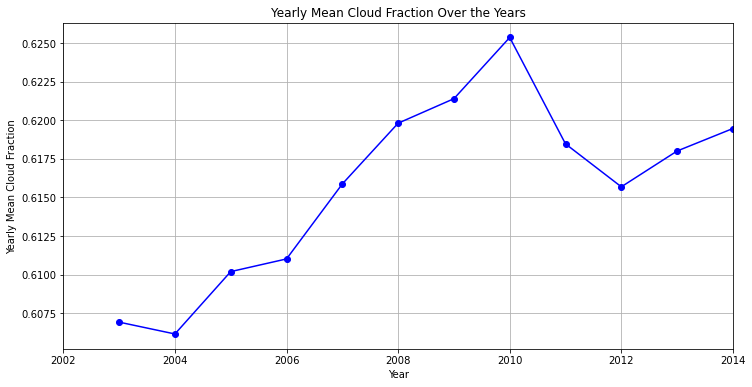

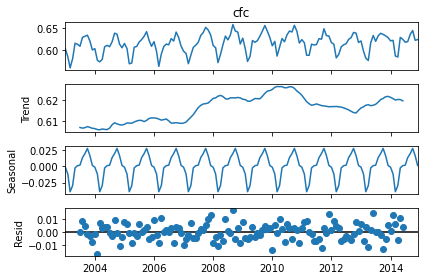

In [168]:
# Group by year and calculate the yearly mean of irradiance
yearly_mean_cfc = cl_cloud_Data.groupby(cl_cloud_Data.index.year)['cfc'].mean()

# Plotting the line graph for each year
plt.figure(figsize=(12, 6))
yearly_mean_cfc.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Cloud Fraction')
plt.title('Yearly Mean Cloud Fraction Over the Years')
plt.grid(True)
plt.xlim(2002,2014)
plt.show()

cloud_decomposed_cfc = seasonal_decompose(cl_cloud_Data['cfc'], model='additive', period=12)
cloud_decomposed_cfc.plot()
plt.show()

In [169]:
# Performing Augmented Dickey-Fuller test for stationarity
result = adfuller(cl_cloud_Data['cfc'])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

ADF Statistic: -1.752536427877026
p-value: 0.4042673841153111
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


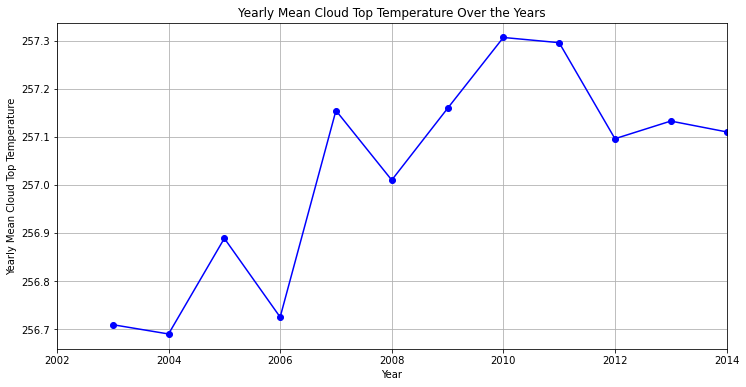

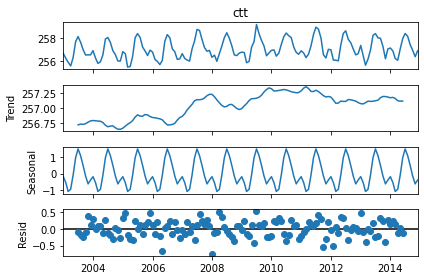

ADF Statistic: -1.6350138505176508
p-value: 0.4648673706048483
Critical Values:
1%: -3.4808880719210005
5%: -2.8836966192225284
10%: -2.5785857598714417


In [170]:
# Group by year and calculate the yearly mean of ctt
yearly_mean_ctt = cl_cloud_Data.groupby(cl_cloud_Data.index.year)['ctt'].mean()

# Plotting the line graph for each year
plt.figure(figsize=(12, 6))
yearly_mean_ctt.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Cloud Top Temperature')
plt.title('Yearly Mean Cloud Top Temperature Over the Years')
plt.grid(True)
plt.xlim(2002, 2014)
plt.show()

# Time Series Decomposition
cloud_decomposed_ctt = seasonal_decompose(cl_cloud_Data['ctt'], model='additive', period=12)
cloud_decomposed_ctt.plot()
plt.show()

# Performing Augmented Dickey-Fuller test for stationarity
result = adfuller(cl_cloud_Data['ctt'])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')


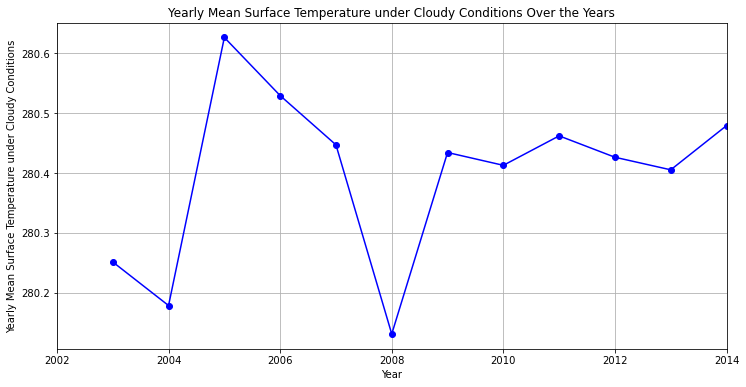

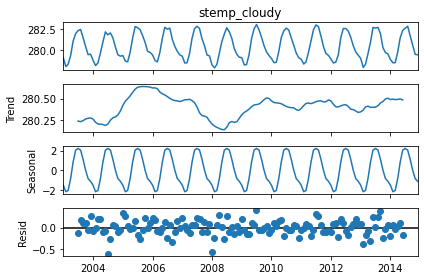

ADF Statistic: -2.4276146717410354
p-value: 0.1340935609147117
Critical Values:
1%: -3.482087964046026
5%: -2.8842185101614626
10%: -2.578864381347275


In [171]:
# Group by year and calculate the yearly mean of ctt
yearly_mean_stemp_cloudy = cl_cloud_Data.groupby(cl_cloud_Data.index.year)['stemp_cloudy'].mean()

# Plotting the line graph for each year
plt.figure(figsize=(12, 6))
yearly_mean_stemp_cloudy.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Surface Temperature under Cloudy Conditions')
plt.title('Yearly Mean Surface Temperature under Cloudy Conditions Over the Years')
plt.grid(True)
plt.xlim(2002, 2014)
plt.show()

# Time Series Decomposition
cloud_decomposed_ctt = seasonal_decompose(cl_cloud_Data['stemp_cloudy'], model='additive', period=12)
cloud_decomposed_ctt.plot()
plt.show()

# Performing Augmented Dickey-Fuller test for stationarity
result = adfuller(cl_cloud_Data['stemp_cloudy'])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')


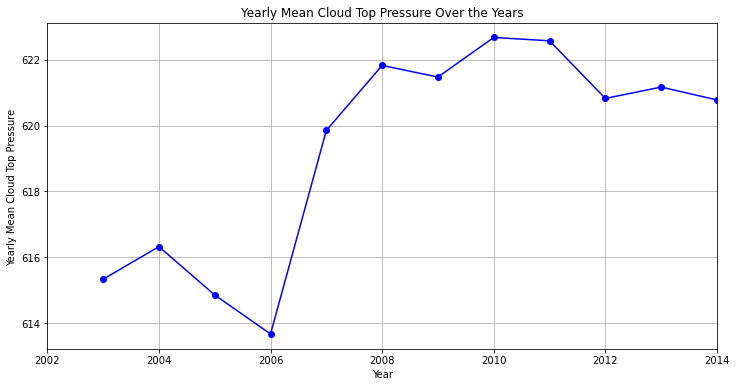

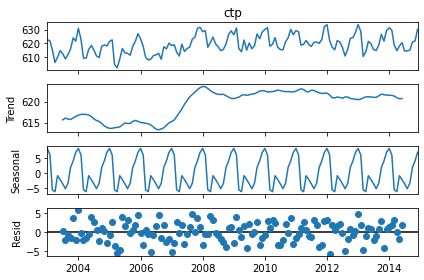

ADF Statistic: -1.7010046097776719
p-value: 0.4305949461603149
Critical Values:
1%: -3.482087964046026
5%: -2.8842185101614626
10%: -2.578864381347275


In [172]:
# Group by year and calculate the yearly mean of ctt
yearly_mean_ctp = cl_cloud_Data.groupby(cl_cloud_Data.index.year)['ctp'].mean()

# Plotting the line graph for each year
plt.figure(figsize=(12, 6))
yearly_mean_ctp.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Cloud Top Pressure ')
plt.title('Yearly Mean Cloud Top Pressure Over the Years')
plt.grid(True)
plt.xlim(2002, 2014)
plt.show()

# Time Series Decomposition
cloud_decomposed_ctt = seasonal_decompose(cl_cloud_Data['ctp'], model='additive', period=12)
cloud_decomposed_ctt.plot()
plt.show()

# Performing Augmented Dickey-Fuller test for stationarity
result = adfuller(cl_cloud_Data['ctp'])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')


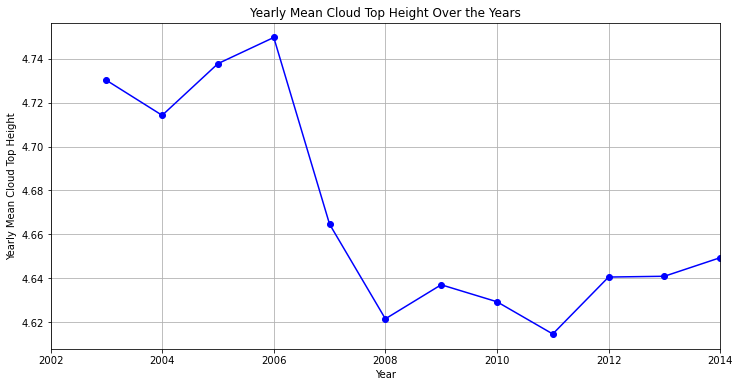

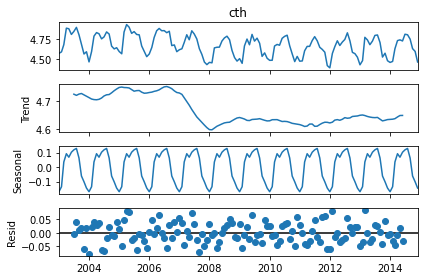

ADF Statistic: -1.80217179856529
p-value: 0.3793839902484869
Critical Values:
1%: -3.482087964046026
5%: -2.8842185101614626
10%: -2.578864381347275


In [173]:
# Group by year and calculate the yearly mean of ctt
yearly_mean_cth = cl_cloud_Data.groupby(cl_cloud_Data.index.year)['cth'].mean()

# Plotting the line graph for each year
plt.figure(figsize=(12, 6))
yearly_mean_cth.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Cloud Top Height')
plt.title('Yearly Mean Cloud Top Height Over the Years')
plt.grid(True)
plt.xlim(2002, 2014)
plt.show()

# Time Series Decomposition
cloud_decomposed_ctt = seasonal_decompose(cl_cloud_Data['cth'], model='additive', period=12)
cloud_decomposed_ctt.plot()
plt.show()

# Performing Augmented Dickey-Fuller test for stationarity
result = adfuller(cl_cloud_Data['cth'])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')


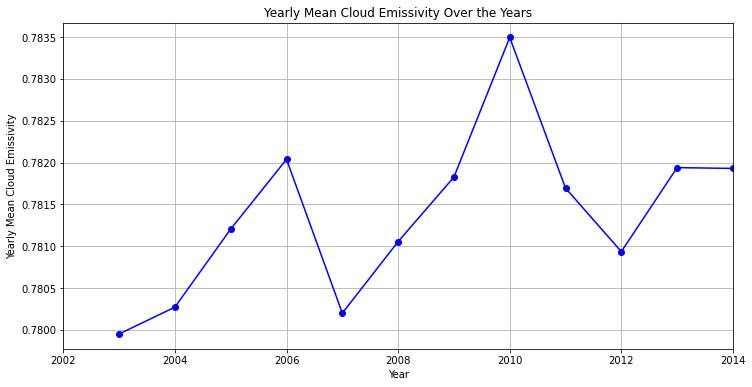

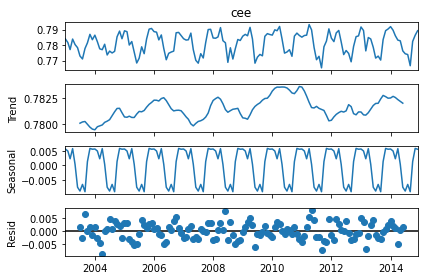

ADF Statistic: -2.5179383818354
p-value: 0.11117050485226848
Critical Values:
1%: -3.4808880719210005
5%: -2.8836966192225284
10%: -2.5785857598714417


In [174]:
# Group by year and calculate the yearly mean of ctt
yearly_mean_cee = cl_cloud_Data.groupby(cl_cloud_Data.index.year)['cee'].mean()

# Plotting the line graph for each year
plt.figure(figsize=(12, 6))
yearly_mean_cee.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Cloud Emissivity')
plt.title('Yearly Mean Cloud Emissivity Over the Years')
plt.grid(True)
plt.xlim(2002, 2014)
plt.show()

# Time Series Decomposition
cloud_decomposed_ctt = seasonal_decompose(cl_cloud_Data['cee'], model='additive', period=12)
cloud_decomposed_ctt.plot()
plt.show()

# Performing Augmented Dickey-Fuller test for stationarity
result = adfuller(cl_cloud_Data['cee'])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')


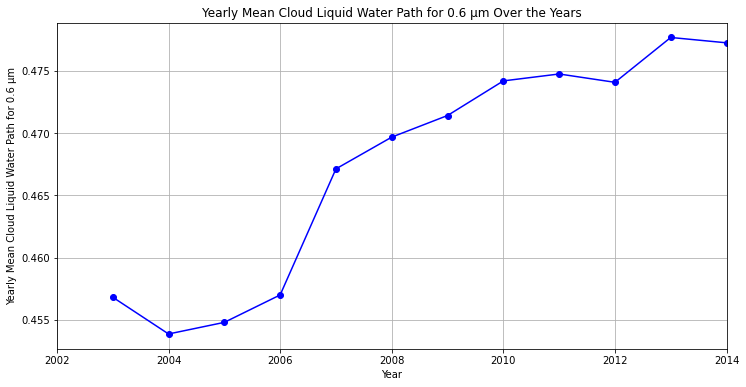

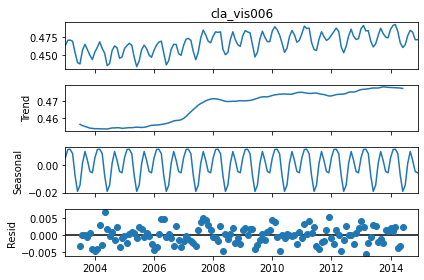

ADF Statistic: -1.3934608540863804
p-value: 0.5854070211857221
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


In [175]:
# Group by year and calculate the yearly mean of ctt
yearly_mean_cla_vis006 = cl_cloud_Data.groupby(cl_cloud_Data.index.year)['cla_vis006'].mean()

# Plotting the line graph for each year
plt.figure(figsize=(12, 6))
yearly_mean_cla_vis006.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Cloud Liquid Water Path for 0.6 µm')
plt.title('Yearly Mean Cloud Liquid Water Path for 0.6 µm Over the Years')
plt.grid(True)
plt.xlim(2002, 2014)
plt.show()

# Time Series Decomposition
cloud_decomposed_ctt = seasonal_decompose(cl_cloud_Data['cla_vis006'], model='additive', period=12)
cloud_decomposed_ctt.plot()
plt.show()

# Performing Augmented Dickey-Fuller test for stationarity
result = adfuller(cl_cloud_Data['cla_vis006'])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')


In [89]:
sunspot_data

Year  Month  Day  Date_in_fraction_of_year  sunspot_number  \
Date                                                                     
1818-01-01  1818      1    1                  1818.001              -1   
1818-01-02  1818      1    2                  1818.004              -1   
1818-01-03  1818      1    3                  1818.007              -1   
1818-01-04  1818      1    4                  1818.010              -1   
1818-01-05  1818      1    5                  1818.012              -1   
...          ...    ...  ...                       ...             ...   
2023-05-27  2023      5   27                  2023.401             139   
2023-05-28  2023      5   28                  2023.404             146   
2023-05-29  2023      5   29                  2023.407             157   
2023-05-30  2023      5   30                  2023.410             165   
2023-05-31  2023      5   31                  2023.412             179   

            standard_deviation  
Date                            
1818-01-01                -1.0  
1818-01-02                -1.0  
1818-01-03                -1.0  
1818-01-04                -1.0  
1818-01-05                -1.0  
...                        ...  
2023-05-27                12.3  
2023-05-28                14.4  
2023-05-29                15.1  
2023-05-30                11.9  
2023-05-31                24.3  

[75026 rows x 6 columns]

In [176]:
grouped_sun_spot_Data = sunspot_data.copy()
grouped_sun_spot_Data = grouped_sun_spot_Data.groupby(['Year','Month']).mean()
grouped_sun_spot_Data

Day  Date_in_fraction_of_year  sunspot_number  \
Year Month                                                        
1818 1      19.625000               1818.052375       58.125000   
     2      15.857143               1818.127071       37.428571   
     3      19.285714               1818.213143       42.357143   
     4      16.619048               1818.290762       57.523810   
     5      16.520000               1818.372640       88.480000   
...               ...                       ...             ...   
2023 1      16.000000               2023.042484      143.645161   
     2      14.500000               2023.123286      110.928571   
     3      16.000000               2023.204097      122.645161   
     4      15.500000               2023.287667       96.400000   
     5      16.000000               2023.371226      137.935484   

            standard_deviation  
Year Month                      
1818 1                9.300000  
     2                6.242857  
     3                7.792857  
     4                9.452381  
     5               11.532000  
...                        ...  
2023 1               27.745161  
     2               19.910714  
     3               16.629032  
     4               16.413333  
     5               19.138710  

[2464 rows x 4 columns]

In [177]:
grouped_sun_spot_Data = grouped_sun_spot_Data.loc[(grouped_sun_spot_Data.index.get_level_values('Year') >= 2003) & (grouped_sun_spot_Data.index.get_level_values('Year') <= 2014)]
grouped_sun_spot_Data = grouped_sun_spot_Data.drop(['Day','Date_in_fraction_of_year'], axis=1)
grouped_sun_spot_Data

sunspot_number  standard_deviation
Year Month                                    
2003 1          133.451613            7.048387
     2           75.678571            5.510714
     3          100.709677            7.003226
     4           97.866667            6.196667
     5           86.838710            6.100000
...                    ...                 ...
2014 8          106.935484            7.009677
     9          130.000000            8.223333
     10          89.967742            6.754839
     11         103.633333            8.203333
     12         112.870968            7.148387

[144 rows x 2 columns]

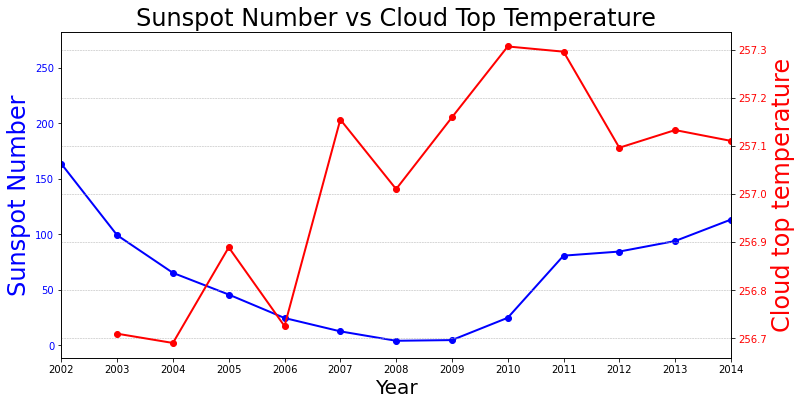

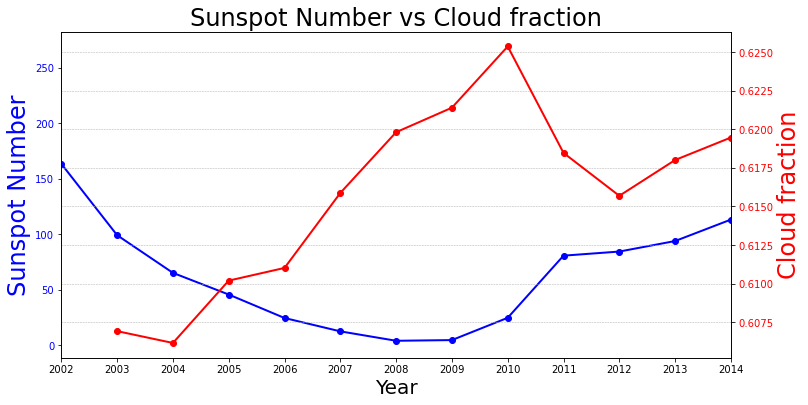

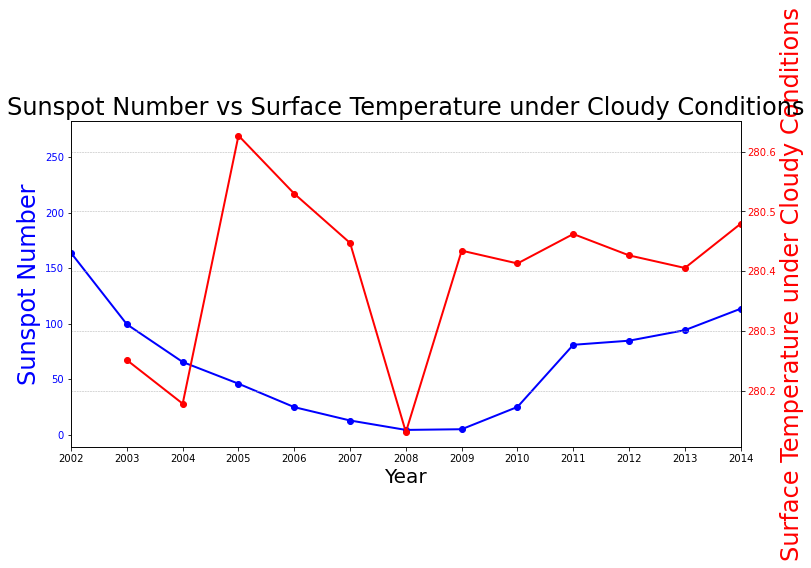

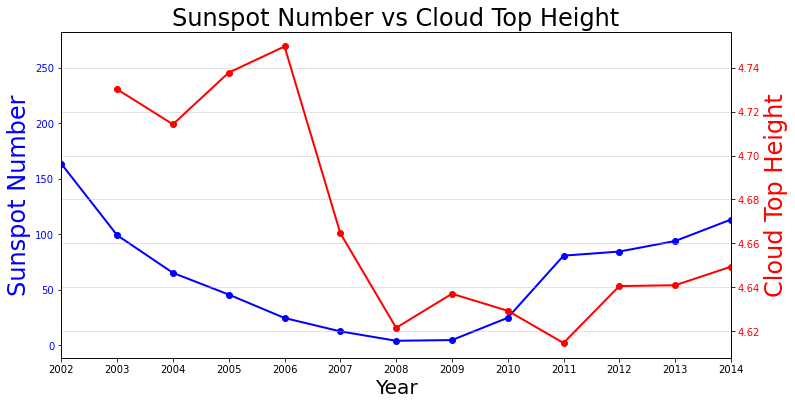

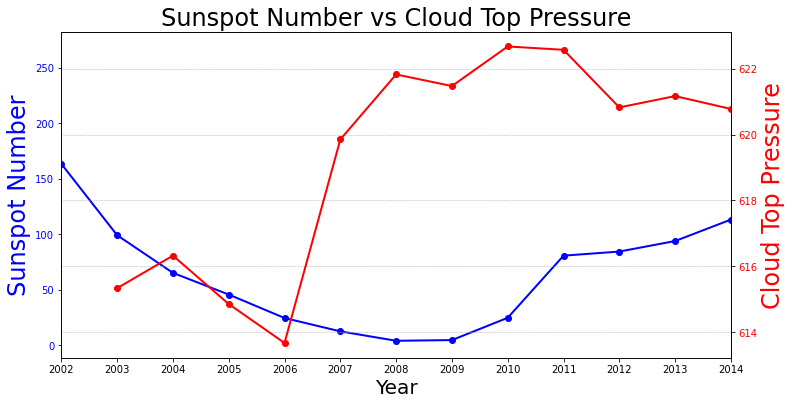

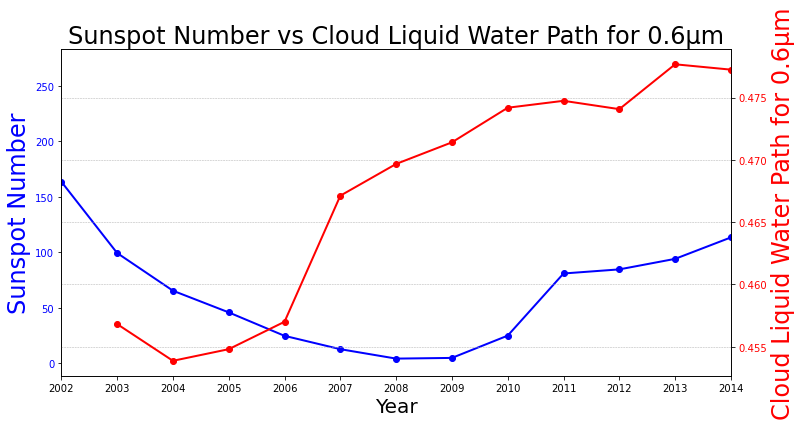

In [184]:
# Calculate the yearly mean for sunspot data
yearly_mean_sunspot = sunspot_data.groupby(sunspot_data.index.year)['sunspot_number'].mean()
yearly_mean_sunspot = yearly_mean_sunspot[yearly_mean_sunspot.index < 2015]

# Calculate the yearly mean for cloud data
yearly_mean_cloud = cl_cloud_Data.resample('Y').mean()

# # Plotting the line graph for yearly mean sunspot number
# plt.figure(figsize=(12, 6))
# plt.plot(yearly_mean_sunspot.index.values, yearly_mean_sunspot.values, marker='o', linestyle='-', color='b', linewidth=2)
# plt.xlabel('Year',fontsize=22,color='w')
# plt.ylabel('Yearly Mean Sunspot Number',fontsize=22,color='w')
# plt.title('Yearly Mean Sunspot Number Over the Years',fontsize=24,color='w')
# plt.xticks(range(2004, 2015,2))
# # Set the background color to black
# plt.gca().set_facecolor('black')

# # Set the tick label colors to white
# plt.xticks(color='white', fontsize=20)
# plt.yticks(color='white', fontsize=16)
# plt.grid(True)

# # Plotting the line graph for yearly mean cloud properties
# plt.figure(figsize=(12, 6))
# for column in yearly_mean_cloud.columns:
#     plt.plot(yearly_mean_cloud.index.values, yearly_mean_cloud[column].values, marker='o', linestyle='-', label=column)
# plt.xlabel('Year')
# plt.ylabel('Yearly Mean Cloud Properties')
# plt.title('Yearly Mean Cloud Properties Over the Years')
# plt.legend()
# #plt.xticks(range(2003, yearly_mean_cloud.index.year.max() + 1))
# plt.grid(True)

# # Plotting the line graph for yearly mean cloud properties
# plt.figure(figsize=(12, 6))
# plt.plot(yearly_mean_cloud.index.values, np.array(yearly_mean_cloud['ctt']), marker='o', linestyle='-', label='ctt', 
#          color='#EC4518', linewidth=2)
# plt.xlabel('Year',fontsize=20,color='w')
# plt.ylabel('Yearly Mean Cloud Properties',fontsize=16,color='w')
# plt.title('Yearly Mean Cloud Surface Temperature Over the Years',fontsize=24,color='w')
# plt.legend(fontsize=22)
# #plt.xticks(range(2002, 2014))
# plt.grid(True)

# # Set the background color to black
# plt.gca().set_facecolor('black')

# # Set the tick label colors to white
# plt.xticks(color='white', fontsize=20)
# plt.yticks(color='white', fontsize=16)

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the line for sunspot numbers on the left y-axis (ax1)
ax1.plot(yearly_mean_sunspot.index.values, yearly_mean_sunspot.values, marker='o', linestyle='-', color='b', linewidth=2,
        label='Sunspots')
ax1.set_xlabel('Year', fontsize=20, color='black')
ax1.set_ylabel('Sunspot Number', fontsize=24, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlim(2002, 2014)
ax1.tick_params(axis='x', labelcolor='black')
ax1.set_xticks(range(2002, 2015))

# Create a second y-axis on the right side for cloud properties
ax2 = ax1.twinx()

# Plot the line for cloud properties on the right y-axis (ax2)
ax2.plot(yearly_mean_cloud.index.year.values, np.array(yearly_mean_cloud['ctt']), marker='o', linestyle='-', 
         color='r', linewidth=2)
ax2.set_ylabel('Cloud top temperature', fontsize=24, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
plt.title('Sunspot Number vs Cloud Top Temperature', fontsize=24, color='black')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

#####################
# Create figure and axis objects for the next plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the line for sunspot numbers on the left y-axis (ax1)
ax1.plot(yearly_mean_sunspot.index.values, yearly_mean_sunspot.values, marker='o', linestyle='-', color='b', linewidth=2,
        label='Sunspots')
ax1.set_xlabel('Year', fontsize=20, color='black')
ax1.set_ylabel('Sunspot Number', fontsize=24, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlim(2002, 2014)
ax1.tick_params(axis='x', labelcolor='black')
ax1.set_xticks(range(2002, 2015))

# Create a second y-axis on the right side for cloud properties
ax2 = ax1.twinx()

# Plot the line for cloud properties on the right y-axis (ax2)
ax2.plot(yearly_mean_cloud.index.year.values, np.array(yearly_mean_cloud['cfc']), marker='o', linestyle='-', 
         color='r', linewidth=2)
ax2.set_ylabel('Cloud fraction', fontsize=24, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
plt.title('Sunspot Number vs Cloud fraction', fontsize=24, color='black')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

#####################
# Create figure and axis objects for the next plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the line for sunspot numbers on the left y-axis (ax1)
ax1.plot(yearly_mean_sunspot.index.values, yearly_mean_sunspot.values, marker='o', linestyle='-', color='b', linewidth=2,
        label='Sunspots')
ax1.set_xlabel('Year', fontsize=20, color='black')
ax1.set_ylabel('Sunspot Number', fontsize=24, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlim(2002, 2014)
ax1.tick_params(axis='x', labelcolor='black')
ax1.set_xticks(range(2002, 2015))

# Create a second y-axis on the right side for cloud properties
ax2 = ax1.twinx()

# Plot the line for cloud properties on the right y-axis (ax2)
ax2.plot(yearly_mean_cloud.index.year.values, np.array(yearly_mean_cloud['stemp_cloudy']), marker='o', linestyle='-', 
         color='r', linewidth=2)
ax2.set_ylabel('Surface Temperature under Cloudy Conditions', fontsize=24, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
plt.title('Sunspot Number vs Surface Temperature under Cloudy Conditions', fontsize=24, color='black')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


#####################
# Create figure and axis objects for the next plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the line for sunspot numbers on the left y-axis (ax1)
ax1.plot(yearly_mean_sunspot.index.values, yearly_mean_sunspot.values, marker='o', linestyle='-', color='b', linewidth=2,
        label='Sunspots')
ax1.set_xlabel('Year', fontsize=20, color='black')
ax1.set_ylabel('Sunspot Number', fontsize=24, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlim(2002, 2014)
ax1.tick_params(axis='x', labelcolor='black')
ax1.set_xticks(range(2002, 2015))

# Create a second y-axis on the right side for cloud properties
ax2 = ax1.twinx()

# Plot the line for cloud properties on the right y-axis (ax2)
ax2.plot(yearly_mean_cloud.index.year.values, np.array(yearly_mean_cloud['cth']), marker='o', linestyle='-', 
         color='r', linewidth=2)
ax2.set_ylabel('Cloud Top Height', fontsize=24, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
plt.title('Sunspot Number vs Cloud Top Height', fontsize=24, color='black')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

#####################
# Create figure and axis objects for the next plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the line for sunspot numbers on the left y-axis (ax1)
ax1.plot(yearly_mean_sunspot.index.values, yearly_mean_sunspot.values, marker='o', linestyle='-', color='b', linewidth=2,
        label='Sunspots')
ax1.set_xlabel('Year', fontsize=20, color='black')
ax1.set_ylabel('Sunspot Number', fontsize=24, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlim(2002, 2014)
ax1.tick_params(axis='x', labelcolor='black')
ax1.set_xticks(range(2002, 2015))

# Create a second y-axis on the right side for cloud properties
ax2 = ax1.twinx()

# Plot the line for cloud properties on the right y-axis (ax2)
ax2.plot(yearly_mean_cloud.index.year.values, np.array(yearly_mean_cloud['ctp']), marker='o', linestyle='-', 
         color='r', linewidth=2)
ax2.set_ylabel('Cloud Top Pressure', fontsize=24, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
plt.title('Sunspot Number vs Cloud Top Pressure', fontsize=24, color='black')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

#####################
# Create figure and axis objects for the next plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the line for sunspot numbers on the left y-axis (ax1)
ax1.plot(yearly_mean_sunspot.index.values, yearly_mean_sunspot.values, marker='o', linestyle='-', color='b', linewidth=2,
        label='Sunspots')
ax1.set_xlabel('Year', fontsize=20, color='black')
ax1.set_ylabel('Sunspot Number', fontsize=24, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlim(2002, 2014)
ax1.tick_params(axis='x', labelcolor='black')
ax1.set_xticks(range(2002, 2015))

# Create a second y-axis on the right side for cloud properties
ax2 = ax1.twinx()

# Plot the line for cloud properties on the right y-axis (ax2)
ax2.plot(yearly_mean_cloud.index.year.values, np.array(yearly_mean_cloud['cla_vis006']), marker='o', linestyle='-', 
         color='r', linewidth=2)
ax2.set_ylabel('Cloud Liquid Water Path for 0.6μm', fontsize=24, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
plt.title('Sunspot Number vs Cloud Liquid Water Path for 0.6μm', fontsize=24, color='black')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [185]:
yearly_mean_cloud.index.values

array(['2003-12-31T00:00:00.000000000', '2004-12-31T00:00:00.000000000',
       '2005-12-31T00:00:00.000000000', '2006-12-31T00:00:00.000000000',
       '2007-12-31T00:00:00.000000000', '2008-12-31T00:00:00.000000000',
       '2009-12-31T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-12-31T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [186]:
yearly_mean_cloud

cfc         ctt  stemp_cloudy       cth         ctp  \
time                                                                   
2003-12-31  0.606929  256.709106    280.251129  4.730257  615.331055   
2004-12-31  0.606163  256.689789    280.178223  4.714275  616.320251   
2005-12-31  0.610200  256.888702    280.626648  4.737855  614.850525   
2006-12-31  0.611021  256.724884    280.529419  4.749774  613.667419   
2007-12-31  0.615875  257.154572    280.447021  4.664635  619.850098   
2008-12-31  0.619808  257.009918    280.130646  4.621483  621.824768   
2009-12-31  0.621394  257.159088    280.434204  4.637021  621.471741   
2010-12-31  0.625358  257.306610    280.412781  4.629274  622.674133   
2011-12-31  0.618467  257.295776    280.462036  4.614584  622.572815   
2012-12-31  0.615690  257.095978    280.426270  4.640539  620.822571   
2013-12-31  0.618008  257.132690    280.405243  4.640897  621.167053   
2014-12-31  0.619465  257.110199    280.479218  4.649366  620.776123   

                 cee  cla_vis006  
time                              
2003-12-31  0.779951    0.456813  
2004-12-31  0.780272    0.453863  
2005-12-31  0.781205    0.454796  
2006-12-31  0.782038    0.456997  
2007-12-31  0.780200    0.467119  
2008-12-31  0.781055    0.469668  
2009-12-31  0.781826    0.471403  
2010-12-31  0.783494    0.474181  
2011-12-31  0.781694    0.474736  
2012-12-31  0.780935    0.474067  
2013-12-31  0.781939    0.477668  
2014-12-31  0.781929    0.477238

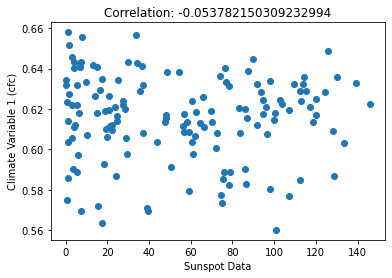

In [190]:
# Reset the index of sunspot data
grouped_sun_spot_Data.reset_index(inplace=True)

# Reset the index of cloud data
cl_cloud_Data.reset_index(inplace=True)

# Convert the 'time' column in the cloud data to datetime format
cl_cloud_Data['time'] = pd.to_datetime(cl_cloud_Data['time'])

# Merge the sunspot and cloud data based on the common time period
merged_data = pd.merge(grouped_sun_spot_Data, cl_cloud_Data, left_on=['Year', 'Month'], right_on=[cl_cloud_Data['time'].dt.year, cl_cloud_Data['time'].dt.month])

# Calculate the correlation between sunspot_number and cfc
correlation1 = merged_data['sunspot_number'].corr(merged_data['cfc'])

# Scatter plot
plt.scatter(merged_data['sunspot_number'], merged_data['cfc'])
plt.xlabel('Sunspot Data')
plt.ylabel('Climate Variable 1 (cfc)')
plt.title('Correlation: {}'.format(correlation1))
plt.show()

In [191]:
merged_data

Year  Month  sunspot_number  standard_deviation       time       cfc  \
0    2003      1      133.451613            7.048387 2003-01-01  0.603225   
1    2003      2       75.678571            5.510714 2003-02-01  0.585202   
2    2003      3      100.709677            7.003226 2003-03-01  0.560134   
3    2003      4       97.866667            6.196667 2003-04-01  0.580635   
4    2003      5       86.838710            6.100000 2003-05-01  0.615798   
..    ...    ...             ...                 ...        ...       ...   
139  2014      8      106.935484            7.009677 2014-08-01  0.619556   
140  2014      9      130.000000            8.223333 2014-09-01  0.635849   
141  2014     10       89.967742            6.754839 2014-10-01  0.644612   
142  2014     11      103.633333            8.203333 2014-11-01  0.622431   
143  2014     12      112.870968            7.148387 2014-12-01  0.624080   

            ctt  stemp_cloudy       cth         ctp       cee  cla_vis006  
0    256.640381    279.012573  4.571618  622.592957  0.784037    0.463520  
1    256.208344    277.944183  4.590077  621.704956  0.781699    0.470448  
2    255.876144    278.235382  4.677673  615.203979  0.777121    0.470804  
3    255.547546    279.307007  4.879736  605.928589  0.783924    0.469125  
4    256.266266    281.033356  4.872612  609.835815  0.780406    0.453990  
..          ...           ...       ...         ...       ...         ...  
139  258.154236    282.848877  4.799066  614.454407  0.773920    0.476860  
140  257.412109    281.678040  4.746330  614.979858  0.766705    0.483894  
141  256.926514    280.598785  4.629466  620.858643  0.782397    0.481435  
142  256.360138    279.441803  4.595596  621.707642  0.786378    0.471307  
143  256.871857    279.387726  4.466073  630.264404  0.789310    0.471240  

[144 rows x 12 columns]

In [195]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [198]:
import plotly.graph_objects as go

# Calculate the correlation between sunspot_number and cloud variables
correlation2 = merged_data['sunspot_number'].corr(merged_data['ctt'])
correlation3 = merged_data['sunspot_number'].corr(merged_data['stemp_cloudy'])
correlation4 = merged_data['sunspot_number'].corr(merged_data['cth'])
correlation5 = merged_data['sunspot_number'].corr(merged_data['ctp'])
correlation6 = merged_data['sunspot_number'].corr(merged_data['cee'])
correlation7 = merged_data['sunspot_number'].corr(merged_data['cla_vis006'])

# # Scatter plot
# plt.scatter(merged_data['sunspot_number'], merged_data['ctt'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 2 (ctt)')
# plt.title('Correlation: {}'.format(correlation2))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['stemp_cloudy'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 3 (stemp_cloudy)')
# plt.title('Correlation: {}'.format(correlation3))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cla_vis006'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 4 (cla_vis006)')
# plt.title('Correlation: {}'.format(correlation4))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cla_vis008'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 5 (cla_vis008)')
# plt.title('Correlation: {}'.format(correlation5))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cee'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 6 (cee)')
# plt.title('Correlation: {}'.format(correlation6))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cer'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 7 (cer)')
# plt.title('Correlation: {}'.format(correlation7))
# plt.show()

# Creating a dictionary of correlations
correlations = {
    'Cloud Fraction (cfc)': correlation1,
    'Cloud Top Temperature (ctt)': correlation2,
    'Cloudy Surface Temperature (stemp_cloudy)': correlation3,
    'Cloud Top Height (cth)': correlation4,
    'Cloud Top Pressure (ctp)': correlation5,
    'Cloud Emissivity (cee)': correlation6,
    'Cloud Albedo at 0.6µm (cla_vis006)': correlation7
}

# Convert dictionary to DataFrame for better visualization
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Cloud Property', 'Correlation with Sunspot Number'])

# Create a table using plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(correlation_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[correlation_df['Cloud Property'], correlation_df['Correlation with Sunspot Number']],
               fill_color='lavender',
               align='left'))
])

# Update the layout and display
fig.update_layout(title="Correlation between Sunspot Number and Various Cloud Properties")
fig.show()

In [205]:
# from scipy.stats import spearmanr, kendalltau

# # Calculate the Spearman's rank correlation coefficient
# correlation2_spearman, _ = spearmanr(merged_data['sunspot_number'], merged_data['ctt'])
# correlation3_spearman, _ = spearmanr(merged_data['sunspot_number'], merged_data['stemp_cloudy'])
# correlation4_spearman, _ = spearmanr(merged_data['sunspot_number'], merged_data['cla_vis006'])
# correlation5_spearman, _ = spearmanr(merged_data['sunspot_number'], merged_data['cla_vis008'])
# correlation6_spearman, _ = spearmanr(merged_data['sunspot_number'], merged_data['cee'])
# correlation7_spearman, _ = spearmanr(merged_data['sunspot_number'], merged_data['cer'])

# # Calculate the Kendall's tau correlation coefficient
# correlation2_kendall, _ = kendalltau(merged_data['sunspot_number'], merged_data['ctt'])
# correlation3_kendall, _ = kendalltau(merged_data['sunspot_number'], merged_data['stemp_cloudy'])
# correlation4_kendall, _ = kendalltau(merged_data['sunspot_number'], merged_data['cla_vis006'])
# correlation5_kendall, _ = kendalltau(merged_data['sunspot_number'], merged_data['cla_vis008'])
# correlation6_kendall, _ = kendalltau(merged_data['sunspot_number'], merged_data['cee'])
# correlation7_kendall, _ = kendalltau(merged_data['sunspot_number'], merged_data['cer'])

# # Scatter plot for Spearman's rank correlation
# plt.scatter(merged_data['sunspot_number'], merged_data['ctt'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 2 (ctt)')
# plt.title('Spearman Correlation: {:.3f}'.format(correlation2_spearman))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['stemp_cloudy'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 3 (stemp_cloudy)')
# plt.title('Spearman Correlation: {:.3f}'.format(correlation3_spearman))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cla_vis006'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 4 (cla_vis006)')
# plt.title('Spearman Correlation: {:.3f}'.format(correlation4_spearman))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cla_vis008'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 5 (cla_vis008)')
# plt.title('Spearman Correlation: {:.3f}'.format(correlation5_spearman))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cee'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 6 (cee)')
# plt.title('Spearman Correlation: {:.3f}'.format(correlation6_spearman))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cer'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 7 (cer)')
# plt.title('Spearman Correlation: {:.3f}'.format(correlation7_spearman))
# plt.show()

# # Scatter plot for Kendall's tau correlation
# plt.scatter(merged_data['sunspot_number'], merged_data['ctt'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 2 (ctt)')
# plt.title('Kendall Correlation: {:.3f}'.format(correlation2_kendall))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['stemp_cloudy'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 3 (stemp_cloudy)')
# plt.title('Kendall Correlation: {:.3f}'.format(correlation3_kendall))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cla_vis006'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 4 (cla_vis006)')
# plt.title('Kendall Correlation: {:.3f}'.format(correlation4_kendall))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cla_vis008'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 5 (cla_vis008)')
# plt.title('Kendall Correlation: {:.3f}'.format(correlation5_kendall))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cee'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 6 (cee)')
# plt.title('Kendall Correlation: {:.3f}'.format(correlation6_kendall))
# plt.show()

# plt.scatter(merged_data['sunspot_number'], merged_data['cer'])
# plt.xlabel('Sunspot Data')
# plt.ylabel('Climate Variable 7 (cer)')
# plt.title('Kendall Correlation: {:.3f}'.format(correlation7_kendall))
# plt.show()

In [199]:
yearly_mean_cloud

cfc         ctt  stemp_cloudy       cth         ctp  \
time                                                                   
2003-12-31  0.606929  256.709106    280.251129  4.730257  615.331055   
2004-12-31  0.606163  256.689789    280.178223  4.714275  616.320251   
2005-12-31  0.610200  256.888702    280.626648  4.737855  614.850525   
2006-12-31  0.611021  256.724884    280.529419  4.749774  613.667419   
2007-12-31  0.615875  257.154572    280.447021  4.664635  619.850098   
2008-12-31  0.619808  257.009918    280.130646  4.621483  621.824768   
2009-12-31  0.621394  257.159088    280.434204  4.637021  621.471741   
2010-12-31  0.625358  257.306610    280.412781  4.629274  622.674133   
2011-12-31  0.618467  257.295776    280.462036  4.614584  622.572815   
2012-12-31  0.615690  257.095978    280.426270  4.640539  620.822571   
2013-12-31  0.618008  257.132690    280.405243  4.640897  621.167053   
2014-12-31  0.619465  257.110199    280.479218  4.649366  620.776123   

                 cee  cla_vis006  
time                              
2003-12-31  0.779951    0.456813  
2004-12-31  0.780272    0.453863  
2005-12-31  0.781205    0.454796  
2006-12-31  0.782038    0.456997  
2007-12-31  0.780200    0.467119  
2008-12-31  0.781055    0.469668  
2009-12-31  0.781826    0.471403  
2010-12-31  0.783494    0.474181  
2011-12-31  0.781694    0.474736  
2012-12-31  0.780935    0.474067  
2013-12-31  0.781939    0.477668  
2014-12-31  0.781929    0.477238

In [200]:
cr_cl = pd.merge(cc_oulu,yearly_mean_cloud,left_on=[cc_oulu['Timestamp'].dt.year,cc_oulu['Timestamp'].dt.month,cc_oulu['Timestamp'].dt.day],
        right_on=[yearly_mean_cloud.index.year,yearly_mean_cloud.index.month,yearly_mean_cloud.index.day])

In [201]:
cr_cl

key_0  key_1  key_2                 Timestamp  FractionalDate  \
0    2003     12     31 2003-12-31 00:00:00+00:00     2003.997260   
1    2004     12     31 2004-12-31 00:00:00+00:00     2004.997268   
2    2005     12     31 2005-12-31 00:00:00+00:00     2005.997260   
3    2006     12     31 2006-12-31 00:00:00+00:00     2006.997260   
4    2007     12     31 2007-12-31 00:00:00+00:00     2007.997260   
5    2008     12     31 2008-12-31 00:00:00+00:00     2008.997268   
6    2009     12     31 2009-12-31 00:00:00+00:00     2009.997260   
7    2010     12     31 2010-12-31 00:00:00+00:00     2010.997260   
8    2011     12     31 2011-12-31 00:00:00+00:00     2011.997260   
9    2012     12     31 2012-12-31 00:00:00+00:00     2012.997268   
10   2013     12     31 2013-12-31 00:00:00+00:00     2013.997260   
11   2014     12     31 2014-12-31 00:00:00+00:00     2014.997260   

    UncorrectedCountRate[cts/min]  CorrectedCountRate[cts/min]  \
0                            5053                         5937   
1                            6610                         6119   
2                            5685                         6203   
3                            7280                         6592   
4                            5422                         6706   
5                            6902                         6743   
6                            6592                         6837   
7                            6745                         6544   
8                            6602                         6430   
9                            6802                         6318   
10                           5956                         6250   
11                           5889                         5833   

    Pressure[mbar]       cfc         ctt  stemp_cloudy       cth         ctp  \
0          1020.80  0.606929  256.709106    280.251129  4.730257  615.331055   
1           988.61  0.606163  256.689789    280.178223  4.714275  616.320251   
2          1010.69  0.610200  256.888702    280.626648  4.737855  614.850525   
3           985.51  0.611021  256.724884    280.529419  4.749774  613.667419   
4          1027.85  0.615875  257.154572    280.447021  4.664635  619.850098   
5           996.57  0.619808  257.009918    280.130646  4.621483  621.824768   
6          1004.71  0.621394  257.159088    280.434204  4.637021  621.471741   
7           995.70  0.625358  257.306610    280.412781  4.629274  622.674133   
8           996.25  0.618467  257.295776    280.462036  4.614584  622.572815   
9           989.78  0.615690  257.095978    280.426270  4.640539  620.822571   
10         1006.26  0.618008  257.132690    280.405243  4.640897  621.167053   
11          998.46  0.619465  257.110199    280.479218  4.649366  620.776123   

         cee  cla_vis006  
0   0.779951    0.456813  
1   0.780272    0.453863  
2   0.781205    0.454796  
3   0.782038    0.456997  
4   0.780200    0.467119  
5   0.781055    0.469668  
6   0.781826    0.471403  
7   0.783494    0.474181  
8   0.781694    0.474736  
9   0.780935    0.474067  
10  0.781939    0.477668  
11  0.781929    0.477238

In [209]:
cr_correlation1 = cr_cl['CorrectedCountRate[cts/min]'].corr(cr_cl['ctt'])
cr_correlation2 = cr_cl['CorrectedCountRate[cts/min]'].corr(cr_cl['cfc'])
cr_correlation3 = cr_cl['CorrectedCountRate[cts/min]'].corr(cr_cl['stemp_cloudy'])
cr_correlation4 = cr_cl['CorrectedCountRate[cts/min]'].corr(cr_cl['cth'])
cr_correlation5 = cr_cl['CorrectedCountRate[cts/min]'].corr(cr_cl['ctp'])
cr_correlation6 = cr_cl['CorrectedCountRate[cts/min]'].corr(cr_cl['cee'])
cr_correlation7 = cr_cl['CorrectedCountRate[cts/min]'].corr(cr_cl['cla_vis006'])
print(cr_correlation1)
print(cr_correlation2)
print(cr_correlation3)
print(cr_correlation4)
print(cr_correlation5)
print(cr_correlation6)
print(cr_correlation7)

# Creating a dictionary of correlations
cr_correlations = {
    'Cloud Fraction (cfc)': cr_correlation1,
    'Cloud Top Temperature (ctt)': cr_correlation2,
    'Cloudy Surface Temperature (stemp_cloudy)': cr_correlation3,
    'Cloud Top Height (cth)': cr_correlation4,
    'Cloud Top Pressure (ctp)': cr_correlation5,
    'Cloud Emissivity (cee)': cr_correlation6,
    'Cloud Albedo at 0.6µm (cla_vis006)': cr_correlation7
}

# Convert dictionary to DataFrame for better visualization
correlation_df = pd.DataFrame(list(cr_correlations.items()), columns=['Cloud Property', 'Correlation with Cosmic Rays Corrected'])

# Create a table using plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(correlation_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[correlation_df['Cloud Property'], correlation_df['Correlation with Cosmic Rays Corrected']],
               fill_color='lavender',
               align='left'))
])

# Update the layout and display
fig.update_layout(title="Correlation with Cosmic Rays Corrected and Various Cloud Properties")
fig.show()

0.36074734803396413
0.4689038890131466
0.007541154188727903
-0.34531371488412355
0.327693125062703
0.23120664365120855
0.15861042129234806


In [119]:
cr_cl.iloc[:,6:].corr()

CorrectedCountRate[cts/min]  Pressure[mbar]  \
CorrectedCountRate[cts/min]                     1.000000       -0.029866   
Pressure[mbar]                                 -0.029866        1.000000   
cfc                                             0.468904       -0.106706   
ctt                                             0.360747        0.065945   
stemp_cloudy                                    0.007541        0.086137   
cth                                            -0.345314        0.104068   
ctp                                             0.327693       -0.064798   
cer                                             0.127538       -0.122144   
cot                                            -0.268358        0.007632   
cee                                             0.231207       -0.434098   
cla_vis008                                      0.153185       -0.089993   
cla_vis006                                      0.158610       -0.093333   

                                  cfc       ctt  stemp_cloudy       cth  \
CorrectedCountRate[cts/min]  0.468904  0.360747      0.007541 -0.345314   
Pressure[mbar]              -0.106706  0.065945      0.086137  0.104068   
cfc                          1.000000  0.894425      0.135234 -0.857575   
ctt                          0.894425  1.000000      0.276332 -0.877035   
stemp_cloudy                 0.135234  0.276332      1.000000  0.154671   
cth                         -0.857575 -0.877035      0.154671  1.000000   
ctp                          0.879799  0.902965     -0.126575 -0.994139   
cer                          0.102469 -0.134730      0.192657  0.079486   
cot                          0.333539  0.487429      0.533999 -0.312597   
cee                          0.718340  0.548974      0.404411 -0.380505   
cla_vis008                   0.859110  0.877606      0.103386 -0.906241   
cla_vis006                   0.861068  0.876429      0.099087 -0.908593   

                                  ctp       cer       cot       cee  \
CorrectedCountRate[cts/min]  0.327693  0.127538 -0.268358  0.231207   
Pressure[mbar]              -0.064798 -0.122144  0.007632 -0.434098   
cfc                          0.879799  0.102469  0.333539  0.718340   
ctt                          0.902965 -0.134730  0.487429  0.548974   
stemp_cloudy                -0.126575  0.192657  0.533999  0.404411   
cth                         -0.994139  0.079486 -0.312597 -0.380505   
ctp                          1.000000 -0.115981  0.326086  0.417332   
cer                         -0.115981  1.000000  0.047928  0.078230   
cot                          0.326086  0.047928  1.000000  0.327092   
cee                          0.417332  0.078230  0.327092  1.000000   
cla_vis008                   0.911565  0.001291  0.639661  0.516403   
cla_vis006                   0.913120  0.008644  0.633769  0.515418   

                             cla_vis008  cla_vis006  
CorrectedCountRate[cts/min]    0.153185    0.158610  
Pressure[mbar]                -0.089993   -0.093333  
cfc                            0.859110    0.861068  
ctt                            0.877606    0.876429  
stemp_cloudy                   0.103386    0.099087  
cth                           -0.906241   -0.908593  
ctp                            0.911565    0.913120  
cer                            0.001291    0.008644  
cot                            0.639661    0.633769  
cee                            0.516403    0.515418  
cla_vis008                     1.000000    0.999931  
cla_vis006                     0.999931    1.000000

In [151]:
# Group the data by date and calculate the mean irradiance for each date
ssi_uv_yearly_mean = uv_data.groupby(['nominal_date_yyyymmdd'])['irradiance'].mean()

ssi_visible_yearly_mean = visisble_data.groupby(['nominal_date_yyyymmdd'])['irradiance'].mean()

ssi_infrared_yearly_mean = Infrared_data.groupby(['nominal_date_yyyymmdd'])['irradiance'].mean()

cl_ssi_uv = pd.merge(ssi_uv_yearly_mean,cl_cloud_Data,left_on=[ssi_uv_yearly_mean.index.year,ssi_uv_yearly_mean.index.month,ssi_uv_yearly_mean.index.day],
        right_on=[cl_cloud_Data.index.year,cl_cloud_Data.index.month,cl_cloud_Data.index.day])

cl_ssi_visible = pd.merge(ssi_visible_yearly_mean,cl_cloud_Data,left_on=[ssi_visible_yearly_mean.index.year,ssi_visible_yearly_mean.index.month,ssi_visible_yearly_mean.index.day],
        right_on=[cl_cloud_Data.index.year,cl_cloud_Data.index.month,cl_cloud_Data.index.day])

cl_ssi_infrared = pd.merge(ssi_infrared_yearly_mean,cl_cloud_Data,left_on=[ssi_infrared_yearly_mean.index.year,ssi_infrared_yearly_mean.index.month,ssi_infrared_yearly_mean.index.day],
        right_on=[cl_cloud_Data.index.year,cl_cloud_Data.index.month,cl_cloud_Data.index.day])


cl_ssi_uv.iloc[:,3:].corr().iloc[1:,:1]

irradiance
cfc             0.193257
ctt             0.119055
stemp_cloudy    0.118708
cth            -0.030926
ctp             0.069878
cer            -0.204348
cot            -0.152865
cee            -0.002901
cla_vis008     -0.106659
cla_vis006     -0.111195

In [152]:
(cl_ssi_visible.iloc[:,3:].corr()).iloc[1:,:1]

irradiance
cfc             0.092455
ctt             0.146915
stemp_cloudy    0.013378
cth            -0.216385
ctp             0.252552
cer            -0.025043
cot             0.273499
cee             0.034081
cla_vis008      0.450005
cla_vis006      0.441325

In [153]:
cl_ssi_infrared.iloc[:,3:].corr().iloc[1:,:1]

irradiance
cfc            -0.187783
ctt            -0.161692
stemp_cloudy   -0.180272
cth            -0.064140
ctp             0.010668
cer             0.184335
cot             0.237230
cee             0.158746
cla_vis008      0.169816
cla_vis006      0.174663

In [156]:
ssi_yearly_mean = data.groupby(['nominal_date_yyyymmdd'])['irradiance'].mean()
ssi_yearly_mean
cl_ssi = pd.merge(ssi_yearly_mean,cl_cloud_Data,left_on=[ssi_yearly_mean.index.year,ssi_yearly_mean.index.month,ssi_yearly_mean.index.day],
        right_on=[cl_cloud_Data.index.year,cl_cloud_Data.index.month,cl_cloud_Data.index.day])

In [157]:
cl_ssi.iloc[:,3:].corr().iloc[1:,:1]

irradiance
cfc             0.184503
ctt             0.131269
stemp_cloudy    0.130306
cth            -0.028001
ctp             0.068499
cer            -0.149448
cot            -0.123850
cee             0.007684
cla_vis008     -0.081665
cla_vis006     -0.085245

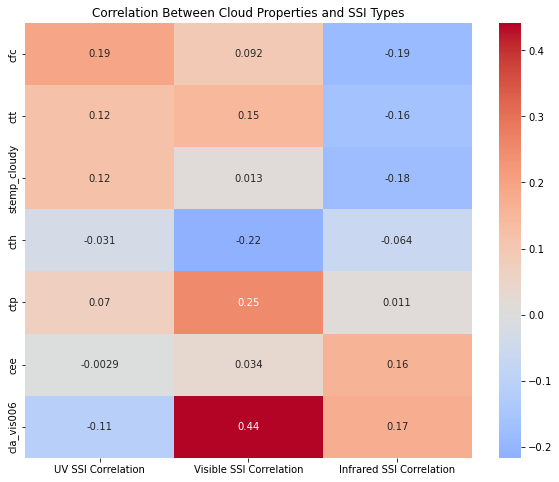

In [223]:
# Group the data by date and calculate the mean irradiance for each date
ssi_uv_yearly_mean = uv_data.groupby(['nominal_date_yyyymmdd'])['irradiance'].mean()

ssi_visible_yearly_mean = visisble_data.groupby(['nominal_date_yyyymmdd'])['irradiance'].mean()

ssi_infrared_yearly_mean = Infrared_data.groupby(['nominal_date_yyyymmdd'])['irradiance'].mean()

# Define a function to merge SSI data with cloud data and drop the 'time' column
def merge_data(ssi_data, cloud_data):
    merged_data = pd.merge(ssi_data, cloud_data, left_on=[ssi_data.index.year, ssi_data.index.month, ssi_data.index.day],
                    right_on=[cl_cloud_Data['time'].dt.year, cl_cloud_Data['time'].dt.month, cl_cloud_Data['time'].dt.day])
    return merged_data.drop(columns=['time'])  # Drop the 'time' column

# Merge the datasets
cl_ssi_uv = merge_data(ssi_uv_yearly_mean, cl_cloud_Data)
cl_ssi_visible = merge_data(ssi_visible_yearly_mean, cl_cloud_Data)
cl_ssi_infrared = merge_data(ssi_infrared_yearly_mean, cl_cloud_Data)

# Calculate correlations
uv_correlation = cl_ssi_uv.iloc[:,3:].corr().iloc[1:,:1]
visible_correlation = cl_ssi_visible.iloc[:,3:].corr().iloc[1:,:1]
infrared_correlation = cl_ssi_infrared.iloc[:,3:].corr().iloc[1:,:1]

# Combine the correlation results into a single dataframe for display
correlation_df = pd.concat([uv_correlation, visible_correlation, infrared_correlation], axis=1)
correlation_df.columns = ['UV SSI Correlation', 'Visible SSI Correlation', 'Infrared SSI Correlation']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Cloud Properties and SSI Types")
plt.show()

In [222]:
print(correlation_df)

              UV SSI Correlation  Visible SSI Correlation  \
time                    0.061234                 0.693266   
cfc                     0.193257                 0.092455   
ctt                     0.119055                 0.146915   
stemp_cloudy            0.118708                 0.013378   
cth                    -0.030926                -0.216385   
ctp                     0.069878                 0.252552   
cee                    -0.002901                 0.034081   
cla_vis006             -0.111195                 0.441325   

              Infrared SSI Correlation  
time                          0.052775  
cfc                          -0.187783  
ctt                          -0.161692  
stemp_cloudy                 -0.180272  
cth                          -0.064140  
ctp                           0.010668  
cee                           0.158746  
cla_vis006                    0.174663  
